In [29]:
from scipy.optimize import linprog
import numpy as np

# Debt data: (Loan amount, Interest rate, Min payment)
debts = np.array([
    [5000, 0.15, 200],  # Loan 1: M5,000 at 15% interest, min payment M200
    [3000, 0.12, 150],  # Loan 2: M3,000 at 12% interest, min payment M150
])

# Monthly income & expenses
income = 5000  
expenses = 2500  

# Define LP problem
num_debts = len(debts)
c = debts[:, 1]  # Interest rates (minimize total interest)
A = np.vstack([-np.eye(num_debts), np.ones(num_debts)])  # Constraints for debt payment
b = np.hstack([-debts[:, 2], income - expenses])  # Payments should cover min requirements

# Solve the LP problem
result = linprog(c, A_ub=A, b_ub=b, method="highs")
optimal_payments = result.x  

print("Optimized Debt Payments:", optimal_payments)


Optimized Debt Payments: [200. 150.]


In [30]:
from sklearn.tree import DecisionTreeClassifier
import pandas as pd
import numpy as np

# Sample Data
data = pd.DataFrame({
    "income": [5000, 6000, 4000, 3000, 7000],
    "expenses": [2500, 3000, 2200, 2700, 3500],
    "debt": [5000, 2000, 7000, 1000, 4000],
    "savings": [500, 1000, 300, 200, 1200],
    "label": ["Stable", "Stable", "At Risk", "Critical", "Stable"]
})

# Split features & labels
X = data.drop(columns=["label"])
y = data["label"]

# Train Decision Tree
model = DecisionTreeClassifier()
model.fit(X, y)

# Predict Financial Status
new_user = np.array([[3000, 3200, 2500, 800]])  # Sample user data
prediction = model.predict(new_user)
print("Financial Status:", prediction)


Financial Status: ['Critical']


c:\Users\Administrator\Desktop\projects\thabo motlakase\.venv\Lib\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(


In [31]:
import numpy as np
from scipy.optimize import linprog

# Debt Data: (Loan amount, Interest rate (monthly), Min payment, Max payment)
debts = np.array([
    [5000, 0.15/12, 200, 1000],  # Loan 1: M5,000 at 15% annual interest
    [3000, 0.12/12, 150, 700],   # Loan 2: M3,000 at 12% annual interest
])

# User's financial profile
income_variability = [5000, 4000, 5500, 6000, 4500, 5000, 4800, 5200, 5300, 4900, 4700, 5100]  # Monthly income
expenses = 2500  # Fixed monthly expenses
months = 12  # Planning period
num_debts = len(debts)

# Initialize payment matrix (rows: months, cols: debts)
payments = np.zeros((months, num_debts))
remaining_balances = debts[:, 0].copy()

def prioritize_debts(strategy="avalanche"):
    """Returns the sorted index of debts based on the chosen strategy."""
    if strategy == "avalanche":  # Highest interest rate first
        return np.argsort(-debts[:, 1])
    elif strategy == "snowball":  # Lowest balance first
        return np.argsort(debts[:, 0])
    return np.arange(num_debts)

priority_order = prioritize_debts(strategy="avalanche")  # Change to "snowball" if needed

for month in range(months):
    available_cash = income_variability[month] - expenses  # Calculate available cash
    c = debts[:, 1]  # Minimize total interest
    A = np.vstack([-np.eye(num_debts), np.ones(num_debts)])  # Payment constraints
    b = np.hstack([-debts[:, 2], available_cash])  # Min payment & budget limit
    
    # Solve LP for optimal payments
    result = linprog(c, A_ub=A, b_ub=b, bounds=[(debts[i, 2], debts[i, 3]) for i in range(num_debts)], method="highs")
    payments[month, :] = result.x if result.success else debts[:, 2]  # Use min payments if LP fails
    
    # Update remaining balances & compound interest for unpaid balances
    for i in priority_order:
        remaining_balances[i] = max(0, remaining_balances[i] - payments[month, i])
        remaining_balances[i] += remaining_balances[i] * debts[i, 1]  # Apply interest

# Print final optimized payments
print("\nOptimized Monthly Payments:")
print(payments)
print("\nRemaining Balances After", months, "Months:")
print(remaining_balances)



Optimized Monthly Payments:
[[200. 150.]
 [200. 150.]
 [200. 150.]
 [200. 150.]
 [200. 150.]
 [200. 150.]
 [200. 150.]
 [200. 150.]
 [200. 150.]
 [200. 150.]
 [200. 150.]
 [200. 150.]]

Remaining Balances After 12 Months:
[3199.5494015 1459.0758839]


In [32]:
import numpy as np
from scipy.optimize import linprog

# User's financial profile
income_variability = [5000, 4000, 5500, 6000, 4500, 5000, 4800, 5200, 5300, 4900, 4700, 5100]  # Monthly income
expenses = 2500  # Fixed monthly expenses
months = 12  # Planning period

# Loan options: (Max Loan Amount, Interest Rate (Annual), Min Payment, Max Payment)
loan_options = np.array([
    [5000, 0.15, 200, 1000],  # Loan 1: M5,000 at 15% annual interest
    [3000, 0.12, 150, 700],   # Loan 2: M3,000 at 12% annual interest
    [7000, 0.18, 300, 1200],  # Loan 3: M7,000 at 18% annual interest
    [4000, 0.10, 180, 800],   # Loan 4: M4,000 at 10% annual interest
])

# Convert annual interest to monthly interest
loan_options[:, 1] /= 12

# Determine the best loan based on available cash flow
available_cash = np.mean(income_variability) - expenses

def recommend_loan():
    best_loan = None
    best_score = float('inf')
    
    for loan in loan_options:
        max_affordable_payment = min(available_cash, loan[3])
        if max_affordable_payment < loan[2]:
            continue  # Skip unaffordable loans
        
        total_interest = loan[1] * loan[0] * months  # Approximate total interest over period
        score = total_interest / max_affordable_payment  # Lower is better
        
        if score < best_score:
            best_score = score
            best_loan = loan
    
    return best_loan

recommended_loan = recommend_loan()
print("\nRecommended Loan Based on Income & Expenses:")
print(f"Amount: M{recommended_loan[0]:.2f}, Interest Rate: {recommended_loan[1] * 12:.2%}, Min Payment: M{recommended_loan[2]:.2f}, Max Payment: M{recommended_loan[3]:.2f}")

# Initialize payment matrix (rows: months, cols: debts)
payments = np.zeros((months, 1))
remaining_balance = recommended_loan[0]
interest_rate = recommended_loan[1]

for month in range(months):
    payment = min(available_cash, recommended_loan[3])  # Pay as much as possible
    payments[month, 0] = payment
    remaining_balance = max(0, remaining_balance - payment)
    remaining_balance += remaining_balance * interest_rate  # Apply interest

print("\nOptimized Monthly Payments:")
print(payments)
print("\nRemaining Balance After", months, "Months:")
print(remaining_balance)


Recommended Loan Based on Income & Expenses:
Amount: M4000.00, Interest Rate: 10.00%, Min Payment: M180.00, Max Payment: M800.00

Optimized Monthly Payments:
[[800.]
 [800.]
 [800.]
 [800.]
 [800.]
 [800.]
 [800.]
 [800.]
 [800.]
 [800.]
 [800.]
 [800.]]

Remaining Balance After 12 Months:
0.0


In [33]:
import numpy as np
from scipy.optimize import linprog

# User's financial profile
income_variability = [5000, 4000, 5500, 6000, 4500, 5000, 4800, 5200, 5300, 4900, 4700, 5100]  # Monthly income
expenses_variability = [2500, 2600, 2400, 2300, 2700, 2500, 2550, 2450, 2600, 2550, 2500, 2400]  # Monthly expenses
months = 12  # Planning period

# Loan options: (Max Loan Amount, Interest Rate (Annual), Min Payment, Max Payment)
loan_options = np.array([
    [5000, 0.10, 200, 1000],  # Loan 1: M5,000 at 15% annual interest
    [3000, 0.30, 150, 700],   # Loan 2: M3,000 at 12% annual interest
    [7000, 0.20, 300, 1200],  # Loan 3: M7,000 at 18% annual interest
    [4000, 0.25, 180, 800],   # Loan 4: M4,000 at 10% annual interest
])

# Convert annual interest to monthly interest
loan_options[:, 1] /= 12

# Determine the best loan based on available cash flow
average_income = np.mean(income_variability)
average_expenses = np.mean(expenses_variability)
available_cash = average_income - average_expenses

def recommend_loan():
    best_loan = None
    best_score = float('inf')
    
    for loan in loan_options:
        max_affordable_payment = min(available_cash, loan[3])
        if max_affordable_payment < loan[2]:
            continue  # Skip unaffordable loans
        
        total_interest = loan[1] * loan[0] * months  # Approximate total interest over period
        score = total_interest / max_affordable_payment  # Lower is better
        
        if score < best_score:
            best_score = score
            best_loan = loan
    
    return best_loan

recommended_loan = recommend_loan()
print("\nRecommended Loan Based on Income & Expenses:")
print(f"Amount: M{recommended_loan[0]:.2f}, Interest Rate: {recommended_loan[1] * 12:.2%}, Min Payment: M{recommended_loan[2]:.2f}, Max Payment: M{recommended_loan[3]:.2f}")

# Initialize payment matrix (rows: months, cols: debts)
payments = np.zeros((months, 1))
remaining_balance = recommended_loan[0]
interest_rate = recommended_loan[1]

for month in range(months):
    available_cash = income_variability[month] - expenses_variability[month]  # Adjust per month
    payment = min(available_cash, recommended_loan[3])  # Pay as much as possible
    payments[month, 0] = payment
    remaining_balance = max(0, remaining_balance - payment)
    remaining_balance += remaining_balance * interest_rate  # Apply interest

print("\nOptimized Monthly Payments:")
print(payments)
print("\nRemaining Balance After", months, "Months:")
print(remaining_balance)



Recommended Loan Based on Income & Expenses:
Amount: M5000.00, Interest Rate: 10.00%, Min Payment: M200.00, Max Payment: M1000.00

Optimized Monthly Payments:
[[1000.]
 [1000.]
 [1000.]
 [1000.]
 [1000.]
 [1000.]
 [1000.]
 [1000.]
 [1000.]
 [1000.]
 [1000.]
 [1000.]]

Remaining Balance After 12 Months:
0.0


In [34]:
import numpy as np

# User's financial profile
income_variability = [5000, 4000, 5500, 6000, 4500, 5000, 4800, 5200, 5300, 4900, 4700, 5100]  # Monthly income
expenses_variability = [2500, 2600, 2400, 2300, 2700, 2500, 2550, 2450, 2600, 2550, 2500, 2400]  # Monthly expenses
months = 12  # Planning period

# Loan options: (Max Loan Amount, Interest Rate (Annual), Min Payment, Max Payment)
loan_options = np.array([
    [5000, 0.15, 200, 1000],  # Loan 1: M5,000 at 15% annual interest
    [3000, 0.12, 150, 700],   # Loan 2: M3,000 at 12% annual interest
    [7000, 0.18, 300, 1200],  # Loan 3: M7,000 at 18% annual interest
    [4000, 0.10, 180, 800],   # Loan 4: M4,000 at 10% annual interest
])

# Convert annual interest to monthly interest
loan_options[:, 1] /= 12

# Determine the best loan based on available cash flow
average_income = np.mean(income_variability)
average_expenses = np.mean(expenses_variability)
available_cash = average_income - average_expenses

def recommend_loan():
    best_loan = None
    best_amount = 0
    best_months = 0
    best_score = float('inf')
    
    for loan in loan_options:
        max_affordable_payment = min(available_cash, loan[3])
        if max_affordable_payment < loan[2]:
            continue  # Skip unaffordable loans
        
        for term in range(6, 61, 6):  # Loan terms from 6 to 60 months
            monthly_interest = loan[1]
            loan_amount = min(loan[0], max_affordable_payment * term)  # Determine max loan amount
            
            total_interest = 0
            balance = loan_amount
            for _ in range(term):
                interest = balance * monthly_interest
                total_interest += interest
                balance -= max_affordable_payment
                balance += interest  # Add interest to balance
                if balance <= 0:
                    break
            
            score = total_interest / term  # Lower is better
            
            if score < best_score:
                best_score = score
                best_loan = loan
                best_amount = loan_amount
                best_months = term
    
    return best_loan, best_amount, best_months

recommended_loan, recommended_amount, recommended_months = recommend_loan()

print("\nRecommended Loan Based on Income & Expenses:")
print(f"Amount: M{recommended_amount:.2f}, Interest Rate: {recommended_loan[1] * 12:.2%}, Min Payment: M{recommended_loan[2]:.2f}, Max Payment: M{recommended_loan[3]:.2f}, Repayment Period: {recommended_months} months")

# Initialize payment matrix (rows: months, cols: debts)
payments = np.zeros((recommended_months, 1))
remaining_balance = recommended_amount
interest_rate = recommended_loan[1]

for month in range(recommended_months):
    available_cash = income_variability[month % len(income_variability)] - expenses_variability[month % len(expenses_variability)]  # Adjust per month
    payment = min(available_cash, recommended_loan[3])  # Pay as much as possible
    payments[month, 0] = payment
    remaining_balance = max(0, remaining_balance - payment)
    remaining_balance += remaining_balance * interest_rate  # Apply interest

print("\nOptimized Monthly Payments:")
print(payments)
print("\nRemaining Balance After", recommended_months, "Months:")
print(remaining_balance)


Recommended Loan Based on Income & Expenses:
Amount: M3000.00, Interest Rate: 12.00%, Min Payment: M150.00, Max Payment: M700.00, Repayment Period: 60 months

Optimized Monthly Payments:
[[700.]
 [700.]
 [700.]
 [700.]
 [700.]
 [700.]
 [700.]
 [700.]
 [700.]
 [700.]
 [700.]
 [700.]
 [700.]
 [700.]
 [700.]
 [700.]
 [700.]
 [700.]
 [700.]
 [700.]
 [700.]
 [700.]
 [700.]
 [700.]
 [700.]
 [700.]
 [700.]
 [700.]
 [700.]
 [700.]
 [700.]
 [700.]
 [700.]
 [700.]
 [700.]
 [700.]
 [700.]
 [700.]
 [700.]
 [700.]
 [700.]
 [700.]
 [700.]
 [700.]
 [700.]
 [700.]
 [700.]
 [700.]
 [700.]
 [700.]
 [700.]
 [700.]
 [700.]
 [700.]
 [700.]
 [700.]
 [700.]
 [700.]
 [700.]
 [700.]]

Remaining Balance After 60 Months:
0.0


In [35]:
import numpy as np

# ========== User Inputs ==========
# Cash flow history (monthly figures)
income_history = np.array([5000, 4000, 5500, 6000, 4500, 5000, 4800, 5200, 5300, 4900, 4700, 5100])
expense_history = np.array([2500, 2600, 2400, 2300, 2700, 2500, 2550, 2450, 2600, 2550, 2500, 2400])
months_history = len(income_history)

# Target savings (monthly)
target_savings = 800  # e.g., M800 saved per month

# Assets: investments, properties, etc.
# You might have a structured dictionary of asset types and values.
assets = {
    'investments': 15000,
    'property': 50000
}
total_assets = sum(assets.values())

# Collateral factor (e.g., you decide you want the maximum loan to be 50% of total assets)
collateral_factor = 0.5
max_loan_by_assets = total_assets * collateral_factor

# ========== Loan Option Data ==========
# Each row: [Min Loan, Max Loan, Annual Interest, Minimum Monthly Payment, Maximum Monthly Payment]
loan_options = np.array([
    [1000, 5000, 0.15, 200, 1000],
    [800, 3000, 0.12, 150, 700],
    [2000, 7000, 0.18, 300, 1200],
    [500, 4000, 0.10, 180, 800],
], dtype=float)

# Convert annual interest to monthly interest for each option:
loan_options[:, 2] /= 12

# ========== Step 1: Determine Financial Flexibility ==========
# Compute average income and expenses from historical data
avg_income = np.mean(income_history)
avg_expenses = np.mean(expense_history)
avg_discretionary = avg_income - avg_expenses - target_savings

print("Average Income: M{:.2f}".format(avg_income))
print("Average Expenses: M{:.2f}".format(avg_expenses))
print("Target Savings: M{:.2f}".format(target_savings))
print("Available monthly surplus for loan repayment: M{:.2f}".format(avg_discretionary))

# Advise whether a loan is even necessary.
if avg_discretionary <= 0:
    print("\nBased on your cash flow, taking on additional debt may strain your ability to meet your savings targets.")
    advise = "Avoid taking a new loan; consider cutting expenses or increasing your income."
else:
    advise = "A loan might be feasible given your surplus cash flow."
print("\nAdvice on taking a loan:")
print(advise)

# ========== Step 2: Determine Safe Loan Range ==========
# Define safe loan range:
#   - Lower bound: the minimum that would make a difference (could be based on specific needs)
#   - Upper bound: the minimum of the maximum allowed by the loan option and what your assets cover
safe_loan_lower = 0  # Possibly, if you need any extra working capital, determine a minimum required amount
safe_loan_upper = max_loan_by_assets
print("\nBased on your assets, you can safely collateralize up to: M{:.2f}".format(safe_loan_upper))

# ========== Step 3: Loan Option Simulation ==========
# For each loan option, and for a range of terms and loan amounts, simulate the monthly repayment schedule.
def simulate_repayment(principal, monthly_rate, term, monthly_payment):
    """
    Simulate the amortization of a loan given:
      - principal: loan amount
      - monthly_rate: monthly interest rate
      - term: number of months over which repayment is made
      - monthly_payment: fixed monthly payment amount
    Returns total interest paid and final balance (if any)
    """
    balance = principal
    total_interest = 0.0
    for _ in range(term):
        interest = balance * monthly_rate
        total_interest += interest
        balance = balance + interest - monthly_payment
        if balance <= 0:
            break
    return total_interest, balance

# We want to choose the option that minimizes a penalty function such as:
#    penalty = (total_interest/term) + lambda * (shortfall in maintaining target surplus)
# where lambda is a factor that weighs the importance of saving targets.
lambda_penalty = 1.0  # adjust based on risk tolerance and target importance

results = []
term_range = range(6, 61, 6)  # consider terms from 6 months to 60 months

# For each loan option, simulate over a grid of principal amounts and terms.
for idx, option in enumerate(loan_options):
    min_loan, max_loan, monthly_rate, min_payment, max_payment = option
    # Adjust maximum possible loan for this option by both the product constraints and your collateral
    option_max = min(max_loan, safe_loan_upper)
    # Use a small grid for loan amounts: from min_loan to option_max (if option_max is higher than min_loan)
    if option_max < min_loan:
        continue  # Skip options that you cannot use because the upper bound is below the lender's minimum.
    principal_grid = np.linspace(min_loan, option_max, num=5)  # 5 sample points
    for term in term_range:
        for principal in principal_grid:
            # Determine what monthly payment can be "afforded" given your surplus and the option limits.
            # Here, we assume you want to use up to your available surplus but not exceeding the max allowed by the loan.
            feasible_payment = min(avg_discretionary, max_payment)
            # But the payment must at least be the lender's minimum requirement.
            if feasible_payment < min_payment:
                continue  # if the payment isn't high enough to satisfy the minimum payment requirement.
            total_interest, final_balance = simulate_repayment(principal, monthly_rate, term, feasible_payment)
            # Compute an adjustment penalty if the payment structure forces you to dip into your savings target.
            # For simulation purposes, if the feasible payment is below what is required to amortize the loan,
            # you might “penalize” that option.
            if final_balance > 0:
                penalty = 1000  # heavy penalty if the loan would not be paid off in term
            else:
                penalty = 0
            score = (total_interest/term) + lambda_penalty * penalty
            results.append({
                "option_index": idx,
                "loan_parameters": option,
                "term": term,
                "principal": principal,
                "monthly_payment": feasible_payment,
                "avg_interest_per_month": total_interest/term,
                "score": score
            })

# ========== Step 4: Selection & Recommendation ==========
if not results:
    print("\nNo loan option meets the feasibility criteria based on your current financial profile.")
else:
    # Choose the result with the lowest score.
    best_result = min(results, key=lambda x: x["score"])
    print("\n--- Loan Optimization Recommendation ---")
    option_used = loan_options[int(best_result["option_index"])]
    print("Recommended Loan Option:")
    print(" - Loan Details:")
    print("     * Minimum Loan: M{:.2f}, Maximum Loan: M{:.2f}".format(option_used[0], option_used[1]))
    print("     * Annual Interest Rate: {:.2%}".format(option_used[2] * 12))
    print("     * Payment Range: M{:.2f} - M{:.2f} per month".format(option_used[3], option_used[4]))
    print(" - Recommended Principal: M{:.2f}".format(best_result["principal"]))
    print(" - Recommended Term: {} months".format(best_result["term"]))
    print(" - Estimated Average Interest Cost per Month: M{:.2f}".format(best_result["avg_interest_per_month"]))
    print(" - Monthly Payment (affordable): M{:.2f}".format(best_result["monthly_payment"]))
    print("\nNote: The simulation also takes into account your target saving requirement and the asset-based collateral constraints.")


Average Income: M5000.00
Average Expenses: M2504.17
Target Savings: M800.00
Available monthly surplus for loan repayment: M1695.83

Advice on taking a loan:
A loan might be feasible given your surplus cash flow.

Based on your assets, you can safely collateralize up to: M32500.00

--- Loan Optimization Recommendation ---
Recommended Loan Option:
 - Loan Details:
     * Minimum Loan: M500.00, Maximum Loan: M4000.00
     * Annual Interest Rate: 10.00%
     * Payment Range: M180.00 - M800.00 per month
 - Recommended Principal: M500.00
 - Recommended Term: 60 months
 - Estimated Average Interest Cost per Month: M0.07
 - Monthly Payment (affordable): M800.00

Note: The simulation also takes into account your target saving requirement and the asset-based collateral constraints.


In [36]:
import pandas as pd
import numpy as np

# Simulate training dataset
np.random.seed(42)

n_samples = 200

# Simulate income and expenses
monthly_income = np.random.randint(3000, 15000, n_samples)
monthly_expenses = np.random.randint(1000, 8000, n_samples)
monthly_surplus = monthly_income - monthly_expenses

# Assets
total_assets_value = np.random.randint(1000, 50000, n_samples)

# Loan options
interest_rate = np.random.uniform(5, 25, n_samples)
min_amount = np.random.randint(1000, 10000, n_samples)
max_amount = min_amount + np.random.randint(1000, 15000, n_samples)
term_months = np.random.choice([6, 12, 18, 24, 36], n_samples)

# Goal
target_savings = np.random.randint(5000, 50000, n_samples)
time_horizon = np.random.choice([6, 12, 18, 24], n_samples)

# Calculate a naive loan amount (midpoint)
loan_amount = (min_amount + max_amount) / 2

# Calculate monthly loan payment using a basic amortized formula
monthly_loan_payment = loan_amount * (interest_rate / 100) / 12

# Calculate achievable savings
achievable_savings = (monthly_surplus - monthly_loan_payment) * time_horizon + loan_amount

# Savings margin (target)
savings_margin = achievable_savings - target_savings

# Binary target: is this loan plan optimal?
is_optimal = (savings_margin >= 0).astype(int)

# Assemble DataFrame
df = pd.DataFrame({
    'average_monthly_income': monthly_income,
    'average_monthly_expenses': monthly_expenses,
    'monthly_surplus': monthly_surplus,
    'total_assets_value': total_assets_value,
    'interest_rate': interest_rate,
    'min_amount': min_amount,
    'max_amount': max_amount,
    'term_months': term_months,
    'target_savings': target_savings,
    'time_horizon': time_horizon,
    'loan_amount': loan_amount,
    'monthly_loan_payment': monthly_loan_payment,
    'achievable_savings': achievable_savings,
    'savings_margin': savings_margin,
    'is_optimal': is_optimal,
})

df.head()


,average_monthly_income,average_monthly_expenses,monthly_surplus,total_assets_value,interest_rate,min_amount,max_amount,term_months,target_savings,time_horizon,loan_amount,monthly_loan_payment,achievable_savings,savings_margin,is_optimal
0,10270,4445,5825,1699,18.934743,8941,12145,12,35907,18,10543.0,166.357499,112398.565020,76491.565020,1
1,3860,4743,-883,1190,17.578857,6569,18358,36,18409,24,12463.5,182.578403,-13110.381668,-31519.381668,0
2,8390,6727,1663,11492,22.549440,5300,7420,6,21514,24,6360.0,119.512033,43403.711198,21889.711198,1
3,8191,2495,5696,36743,19.701421,7269,19529,6,34866,18,13399.0,219.982782,111967.309925,77101.309925,1
4,14964,4304,10660,7102,21.069619,4818,6768,18,7983,12,5793.0,101.713584,132492.436994,124509.436994,1


In [37]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split

model = RandomForestRegressor(n_estimators=100)

X = df[[
    'average_monthly_income', 'average_monthly_expenses', 'total_assets_value',
    'interest_rate', 'min_amount', 'max_amount', 'term_months', 'target_savings', 'time_horizon'
]]

y = df['savings_margin']  # or binary label

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)
model.fit(X_train, y_train)


RandomForestRegressor()

In [38]:
import pandas as pd
import numpy as np
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score, mean_squared_error

# ----- Step 1: Generate a simulated dataset -----

np.random.seed(42)
n_samples = 200

# Simulate cashflow details
monthly_income = np.random.randint(3000, 15000, n_samples)
monthly_expenses = np.random.randint(1000, 8000, n_samples)
monthly_surplus = monthly_income - monthly_expenses

# Simulate asset data
total_assets_value = np.random.randint(1000, 50000, n_samples)

# Simulate loan option details
interest_rate = np.random.uniform(5, 25, n_samples)
min_amount = np.random.randint(1000, 10000, n_samples)
max_amount = min_amount + np.random.randint(1000, 15000, n_samples)
term_months = np.random.choice([6, 12, 18, 24, 36], n_samples)

# Simulate savings goals
target_savings = np.random.randint(5000, 50000, n_samples)
time_horizon = np.random.choice([6, 12, 18, 24], n_samples)

# Calculate a naive loan amount (midpoint)
loan_amount = (min_amount + max_amount) / 2

# Calculate monthly loan payment using a simple approximation
monthly_loan_payment = loan_amount * (interest_rate / 100) / 12

# Calculate achievable savings based on surplus, monthly payment and time horizon
achievable_savings = (monthly_surplus - monthly_loan_payment) * time_horizon + loan_amount

# Savings margin (difference between achievable savings and target savings)
savings_margin = achievable_savings - target_savings

# Binary target: 1 if achievable savings meets/exceeds target, else 0
is_optimal = (savings_margin >= 0).astype(int)

# Assemble DataFrame
df = pd.DataFrame({
    'average_monthly_income': monthly_income,
    'average_monthly_expenses': monthly_expenses,
    'monthly_surplus': monthly_surplus,
    'total_assets_value': total_assets_value,
    'interest_rate': interest_rate,
    'min_amount': min_amount,
    'max_amount': max_amount,
    'term_months': term_months,
    'target_savings': target_savings,
    'time_horizon': time_horizon,
    'loan_amount': loan_amount,
    'monthly_loan_payment': monthly_loan_payment,
    'achievable_savings': achievable_savings,
    'savings_margin': savings_margin,
    'is_optimal': is_optimal,
})

print("First 5 rows of the dataset:")
print(df.head())

# ----- Step 2: Train/Test Split and Model Training -----

X = df[[ 
    'average_monthly_income',
    'average_monthly_expenses',
    'total_assets_value',
    'interest_rate',
    'min_amount',
    'max_amount',
    'term_months',
    'target_savings',
    'time_horizon'
]]
y = df['savings_margin']  # Using the continuous savings_margin value

# Split the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Instantiate and train the RandomForestRegressor
model = RandomForestRegressor(n_estimators=100, random_state=42)
model.fit(X_train, y_train)

# ----- Step 3: Evaluate the Model on Test Set -----

# Generate predictions on the test set
y_pred = model.predict(X_test)

# Compute evaluation metrics
r2 = r2_score(y_test, y_pred)
rmse = np.sqrt(mean_squared_error(y_test, y_pred))

print("\nEvaluation on Test Set:")
print("R2 Score:", r2)
print("RMSE:", rmse)

# ----- Step 4: Generate New Testing Data and Use the Model -----

# Here is an example of new loan option data (as a DataFrame)
new_test_data = pd.DataFrame({
    'average_monthly_income': [8000, 12000],
    'average_monthly_expenses': [4000, 3500],
    'total_assets_value': [15000, 25000],
    'interest_rate': [10.0, 12.5],
    'min_amount': [5000, 7000],
    'max_amount': [8000, 10000],
    'term_months': [12, 24],
    'target_savings': [20000, 30000],
    'time_horizon': [12, 24]
})

# Generate predictions for the new testing data
new_predictions = model.predict(new_test_data)
print("\nPredictions for new test data (savings_margin):")
print(new_predictions)

# Optionally, if you want to assess optimality based on savings_margin being non-negative:
new_optimal = new_predictions >= 0
print("\nAre the new loan options optimal?")
print(new_optimal)


First 5 rows of the dataset:
   average_monthly_income  average_monthly_expenses  monthly_surplus  \
0                   10270                      4445             5825   
1                    3860                      4743             -883   
2                    8390                      6727             1663   
3                    8191                      2495             5696   
4                   14964                      4304            10660   

   total_assets_value  interest_rate  min_amount  max_amount  term_months  \
0                1699      18.934743        8941       12145           12   
1                1190      17.578857        6569       18358           36   
2               11492      22.549440        5300        7420            6   
3               36743      19.701421        7269       19529            6   
4                7102      21.069619        4818        6768           18   

   target_savings  time_horizon  loan_amount  monthly_loan_payment  \
0    

In [39]:
import pandas as pd
import numpy as np
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import (
    r2_score, 
    mean_squared_error, 
    mean_absolute_error, 
    explained_variance_score,
    accuracy_score,
    confusion_matrix,
    classification_report
)

# Predictions on the test set
y_pred = model.predict(X_test)

# Calculate regression metrics
r2 = r2_score(y_test, y_pred)
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
mae = mean_absolute_error(y_test, y_pred)
explained_var = explained_variance_score(y_test, y_pred)

print("\n--- Regression Metrics ---")
print("R2 Score:", r2)
print("Root Mean Squared Error (RMSE):", rmse)
print("Mean Absolute Error (MAE):", mae)
print("Explained Variance Score:", explained_var)

# ----- Step 4: Evaluate the Model as a Classifier for Optimality -----
# By thresholding predictions: consider predictions with savings_margin >= 0 as optimal

threshold = 0
# Convert continuous predictions to binary optimality decisions
y_test_class = (y_test >= threshold).astype(int)
y_pred_class = (y_pred >= threshold).astype(int)

# Compute classification metrics
accuracy = accuracy_score(y_test_class, y_pred_class)
conf_matrix = confusion_matrix(y_test_class, y_pred_class)
class_report = classification_report(y_test_class, y_pred_class)

print("\n--- Classification Metrics for Optimality (savings_margin >= 0) ---")
print("Accuracy:", accuracy)
print("Confusion Matrix:\n", conf_matrix)
print("Classification Report:\n", class_report)


--- Regression Metrics ---
R2 Score: 0.9144753327637765
Root Mean Squared Error (RMSE): 21623.01478765296
Mean Absolute Error (MAE): 16365.138809278364
Explained Variance Score: 0.9197690092948765

--- Classification Metrics for Optimality (savings_margin >= 0) ---
Accuracy: 0.975
Confusion Matrix:
 [[10  1]
 [ 0 29]]
Classification Report:
               precision    recall  f1-score   support

           0       1.00      0.91      0.95        11
           1       0.97      1.00      0.98        29

    accuracy                           0.97        40
   macro avg       0.98      0.95      0.97        40
weighted avg       0.98      0.97      0.97        40



In [40]:
import pandas as pd

# Define the personal financial profile (remains constant)
user_profile = {
    'total_assets_value': 25000,
    'average_monthly_income': 12000,
    'average_monthly_expenses': 4000,
    'target_savings': 30000
}

# Define multiple loan options in a DataFrame
loan_options = pd.DataFrame({
    'min_amount': [5000, 7000, 6000],
    'interest_rate': [10.0, 12.5, 11.0],
    'max_amount': [8000, 10000, 9000],
    'term_months': [12, 24, 18]
})

# Attach the user's financial profile to each loan option row
loan_options['total_assets_value'] = user_profile['total_assets_value']
loan_options['average_monthly_income'] = user_profile['average_monthly_income']
loan_options['average_monthly_expenses'] = user_profile['average_monthly_expenses']
loan_options['target_savings'] = user_profile['target_savings']

# Display the combined DataFrame for testing or model input
loan_options


,min_amount,interest_rate,max_amount,term_months,total_assets_value,average_monthly_income,average_monthly_expenses,target_savings
0,5000,10.0,8000,12,25000,12000,4000,30000
1,7000,12.5,10000,24,25000,12000,4000,30000
2,6000,11.0,9000,18,25000,12000,4000,30000


In [41]:
import pandas as pd
import numpy as np
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score, mean_squared_error

# ===============================
# TRAINING PHASE: Create Synthetic Dataset and Train Model
# ===============================

np.random.seed(42)
n_samples = 200

# --- Personal Financial Data (varying across training samples) ---
average_monthly_income = np.random.randint(3000, 15000, n_samples)
average_monthly_expenses = np.random.randint(1000, 8000, n_samples)
total_assets_value = np.random.randint(1000, 50000, n_samples)
target_savings = np.random.randint(5000, 50000, n_samples)
time_horizon = np.random.choice([6, 12, 18, 24], n_samples)

# --- Loan Option Details ---
min_amount = np.random.randint(1000, 10000, n_samples)
max_amount = min_amount + np.random.randint(1000, 15000, n_samples)
interest_rate = np.random.uniform(5, 25, n_samples)
term_months = np.random.choice([6, 12, 18, 24, 36], n_samples)
# Loan names
loan_names = np.random.choice(
    ['Starter Loan', 'AgriFlex', 'Business Boost', 'SmartSaver', 'GreenGrowth', 'HomeEase', 'QuickFund', 'EduPlan'],
    n_samples
)

# --- Derived Calculations ---
# Loan amount is set as the midpoint between min and max amounts:
loan_amount = (min_amount + max_amount) / 2

# Estimate monthly loan payment using a simple approximation:
monthly_loan_payment = loan_amount * (interest_rate / 100) / 12

# Calculate monthly surplus:
monthly_surplus = average_monthly_income - average_monthly_expenses

# Calculate achievable savings:
achievable_savings = (monthly_surplus - monthly_loan_payment) * time_horizon + loan_amount

# Savings margin is the difference between achievable savings and target savings:
savings_margin = achievable_savings - target_savings

# The regression target will be the continuous savings margin:
y = savings_margin

# Assemble the training features into a DataFrame
df_train = pd.DataFrame({
    'average_monthly_income': average_monthly_income,
    'average_monthly_expenses': average_monthly_expenses,
    'total_assets_value': total_assets_value,
    'interest_rate': interest_rate,
    'min_amount': min_amount,
    'max_amount': max_amount,
    'term_months': term_months,
    'target_savings': target_savings,
    'time_horizon': time_horizon,
    "loan_names": loan_names,
})

print("Training DataFrame (first 5 rows):")
df_train.head()





Training DataFrame (first 5 rows):


,average_monthly_income,average_monthly_expenses,total_assets_value,interest_rate,min_amount,max_amount,term_months,target_savings,time_horizon,loan_names
0,10270,4445,1699,22.891045,1055,9251,24,29052,18,AgriFlex
1,3860,4743,1190,20.997105,9717,22442,12,43513,18,EduPlan
2,8390,6727,11492,13.504270,9150,21709,6,31092,6,EduPlan
3,8191,2495,36743,5.449386,3125,7493,6,16338,6,AgriFlex
4,14964,4304,7102,10.373547,1364,6161,36,5412,6,SmartSaver


In [42]:
# ----- Split the Data and Train the Model -----
X_train, X_test, y_train, y_test = train_test_split(df_train, y, test_size=0.2, random_state=42)
model = RandomForestRegressor(n_estimators=100, random_state=42)
model.fit(X_train, y_train)

# Evaluate model performance on the test set
y_pred = model.predict(X_test)
print("\n--- Model Evaluation on Test Set ---")
print("R2 Score:", r2_score(y_test, y_pred))
print("RMSE:", np.sqrt(mean_squared_error(y_test, y_pred)))

ValueError: could not convert string to float: 'Starter Loan'

In [43]:
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline

# --- Preprocessing: One-Hot Encoding for loan_names ---
# Convert loan_names to one-hot encoded columns
column_transformer = ColumnTransformer(
    transformers=[
        ('loan_names', OneHotEncoder(), ['loan_names'])  # Apply OneHotEncoder to loan_names column
    ], 
    remainder='passthrough'  # Keep the rest of the columns as they are
)

# --- Define the model pipeline ---
pipeline = Pipeline(steps=[
    ('preprocessor', column_transformer),  # Preprocess the data
    ('regressor', RandomForestRegressor(n_estimators=100, random_state=42))  # Train using RandomForest
])



y = df_train['target_savings']
X = df_train.drop(columns=['target_savings'])


# --- Train the model ---
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
pipeline.fit(X_train, y_train)

# --- Evaluate the model ---
y_pred = pipeline.predict(X_test)

# --- Calculate Metrics ---
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"Mean Absolute Error: {mae}")
print(f"Mean Squared Error: {mse}")
print(f"R-squared: {r2}")


Mean Absolute Error: 14094.752000000002
Mean Squared Error: 263681516.01436996
R-squared: -0.24884435895993584


In [44]:
# ===============================
# PREDICTION PHASE: Using the Trained Model
# ===============================

# --- Step 1: Define the Constant User Financial Profile ---
user_profile = {
    'total_assets_value': 25000,
    'average_monthly_income': 12000,
    'average_monthly_expenses': 4000,
    'target_savings': 30000,
    'time_horizon': 12  # Example: 12 months
}

# --- Step 2: Define Multiple Loan Options to Evaluate ---
# Each row represents one loan option candidate.
loan_options = pd.DataFrame({
    'min_amount': [5000, 7000, 6000],
    'interest_rate': [10.0, 12.5, 11.0],
    'max_amount': [8000, 10000, 9000],
    'term_months': [12, 24, 18],
    'loan_names': ['Business Boost', 'SmartSaver', 'AgriFlex']  # Example loan names
})

# --- Step 3: Calculate the Derived Loan Amount and Monthly Payment ---
loan_options['loan_amount'] = (loan_options['min_amount'] + loan_options['max_amount']) / 2
loan_options['monthly_loan_payment'] = loan_options['loan_amount'] * (loan_options['interest_rate'] / 100) / 12

# --- Step 4: Calculate Monthly Surplus ---
monthly_surplus = user_profile['average_monthly_income'] - user_profile['average_monthly_expenses']

# --- Step 5: Calculate Achievable Savings ---
loan_options['achievable_savings'] = (monthly_surplus - loan_options['monthly_loan_payment']) * user_profile['time_horizon'] + loan_options['loan_amount']

# --- Step 6: Calculate Savings Margin ---
loan_options['savings_margin'] = loan_options['achievable_savings'] - user_profile['target_savings']

# --- Step 7: Prepare the Prediction Data ---
# Create a DataFrame of user profile information and loan options
X_predict = pd.DataFrame({
    'total_assets_value': [user_profile['total_assets_value']] * len(loan_options),
    'average_monthly_income': [user_profile['average_monthly_income']] * len(loan_options),
    'average_monthly_expenses': [user_profile['average_monthly_expenses']] * len(loan_options),
    'interest_rate': loan_options['interest_rate'],
    'min_amount': loan_options['min_amount'],
    'max_amount': loan_options['max_amount'],
    'term_months': loan_options['term_months'],
    'target_savings': [user_profile['target_savings']] * len(loan_options),
    'time_horizon': [user_profile['time_horizon']] * len(loan_options),
    'loan_names': loan_options['loan_names']
})

# --- Step 8: Preprocess and Make Predictions ---
# Use the trained pipeline to predict the savings margin
predicted_savings_margin = pipeline.predict(X_predict)

# --- Step 9: Display the Predictions ---
loan_options['predicted_savings_margin'] = predicted_savings_margin
print("Loan Options with Predicted Savings Margin:")
print(loan_options[['loan_names', 'predicted_savings_margin']])


Loan Options with Predicted Savings Margin:
       loan_names  predicted_savings_margin
0  Business Boost                  24899.04
1      SmartSaver                  23501.90
2        AgriFlex                  26316.77


In [45]:
# ===============================
# PREDICTION PHASE: Evaluate Multiple Loan Options for a Single User Profile
# ===============================

# --- Step 1: Define the Constant User Financial Profile ---
user_profile = {
    'total_assets_value': 25000,
    'average_monthly_income': 12000,
    'average_monthly_expenses': 4000,
    'target_savings': 30000
}

# --- Step 2: Define Multiple Loan Options to Evaluate ---
# Each row represents one loan option candidate.
loan_options = pd.DataFrame({
    'min_amount': [5000, 7000, 6000],
    'interest_rate': [10.0, 12.5, 11.0],
    'max_amount': [8000, 10000, 9000],
    'term_months': [12, 24, 18],
})

# Assume a fixed time horizon for prediction (if required by the model)
loan_options['time_horizon'] = 12

# --- Step 3: Attach the User Profile to Each Loan Option ---
loan_options['total_assets_value'] = user_profile['total_assets_value']
loan_options['average_monthly_income'] = user_profile['average_monthly_income']
loan_options['average_monthly_expenses'] = user_profile['average_monthly_expenses']
loan_options['target_savings'] = user_profile['target_savings']

# Reorder columns to match the training features order:
features_order = [
    'average_monthly_income',
    'average_monthly_expenses',
    'total_assets_value',
    'interest_rate',
    'min_amount',
    'max_amount',
    'term_months',
    'target_savings',
    'time_horizon'
]
loan_options = loan_options[features_order]

print("\nLoan Options for Evaluation:")
print(loan_options)

# --- Step 4: Predict Savings Margin for Each Loan Option ---
predictions = model.predict(loan_options)
loan_options['predicted_savings_margin'] = predictions

print("\nPredicted Savings Margins for Each Loan Option:")
print(loan_options[['min_amount', 'interest_rate', 'max_amount', 'term_months', 'predicted_savings_margin']])

# --- Step 5: Select the Best Loan Option ---
# Here, the best option is defined as the one with the highest predicted savings margin.
best_option_index = loan_options['predicted_savings_margin'].idxmax()
best_loan = loan_options.loc[best_option_index]
print("\nBest Loan Option Based on Predicted Savings Margin:")
print(best_loan)



Loan Options for Evaluation:
   average_monthly_income  average_monthly_expenses  total_assets_value  \
0                   12000                      4000               25000   
1                   12000                      4000               25000   
2                   12000                      4000               25000   

   interest_rate  min_amount  max_amount  term_months  target_savings  \
0           10.0        5000        8000           12           30000   
1           12.5        7000       10000           24           30000   
2           11.0        6000        9000           18           30000   

   time_horizon  
0            12  
1            12  
2            12  


AttributeError: 'RandomForestRegressor' object has no attribute 'estimators_'

In [ ]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor, RandomForestClassifier
from sklearn.metrics import mean_squared_error, r2_score, confusion_matrix, classification_report

# ---- Step 1: Generate Realistic Synthetic Data ----

np.random.seed(42)
n_samples = 500

# Assets table simulation
assets = pd.DataFrame({
    'id': [f'asset_{i}' for i in range(n_samples)],
    'assetName': np.random.choice(['Land', 'Livestock', 'Machinery', 'Savings', 'Vehicle'], n_samples),
    'amount': np.random.uniform(1000, 50000, n_samples),
    'date': pd.date_range('2021-01-01', periods=n_samples, freq='D').astype(str),
    'type': np.random.choice(['Fixed', 'Liquid'], n_samples)
})

# Loan options table simulation
loan_options = pd.DataFrame({
    'id': [f'loan_{i}' for i in range(10)],
    'name': np.random.choice(['AgriFlex', 'Business Boost', 'HomeEase', 'QuickFund'], 10),
    'interest': np.random.uniform(0.08, 0.25, 10),
    'minAmount': np.random.uniform(1000, 5000, 10),
    'maxAmount': np.random.uniform(6000, 20000, 10),
    'paymentTerm': np.random.choice(['6', '12', '18', '24', '36'], 10),
    'date': pd.date_range('2022-01-01', periods=10, freq='M').astype(str)
})

# Expenses table simulation
expenses = pd.DataFrame({
    'id': [f'exp_{i}' for i in range(n_samples)],
    'name': np.random.choice(['Seeds', 'Fertilizer', 'Labor', 'Transport', 'Utilities'], n_samples),
    'amount': np.random.uniform(100, 3000, n_samples),
    'date': pd.date_range('2021-01-01', periods=n_samples, freq='D').astype(str),
    'category': np.random.choice(['Input', 'Operational', 'Maintenance'], n_samples),
    'notes': np.random.choice(['Seasonal', 'Recurring', 'One-off'], n_samples)
})

# Taken loans table simulation
taken_loans = pd.DataFrame({
    'id': [f'taken_{i}' for i in range(n_samples)],
    'loanId': np.random.choice(loan_options['id'], n_samples),
    'amount': np.random.uniform(1000, 20000, n_samples),
    'paymentTerm': np.random.choice([6, 12, 18, 24, 36], n_samples),
    'date': pd.date_range('2021-01-01', periods=n_samples, freq='D').astype(str),
    'paid': np.random.choice([0, 1], n_samples, p=[0.7, 0.3])
})

# Loan history aggregation per user (simulate user_id)
user_ids = [f'user_{i}' for i in range(50)]
taken_loans['user_id'] = np.random.choice(user_ids, n_samples)
assets['user_id'] = np.random.choice(user_ids, n_samples)
expenses['user_id'] = np.random.choice(user_ids, n_samples)

# ---- Step 2: Feature Engineering for Model ----

# Aggregate features per user
user_features = []
for user in user_ids:
    user_assets = assets[assets['user_id'] == user]['amount'].sum()
    user_expenses = expenses[expenses['user_id'] == user]['amount'].sum()
    user_loans = taken_loans[taken_loans['user_id'] == user]
    total_taken = user_loans['amount'].sum()
    active_loans = user_loans[user_loans['paid'] == 0]['amount'].sum()
    avg_interest = user_loans.merge(loan_options, left_on='loanId', right_on='id')['interest'].mean() if not user_loans.empty else 0
    n_loans = len(user_loans)
    user_features.append({
        'user_id': user,
        'total_assets': user_assets,
        'total_expenses': user_expenses,
        'total_taken_loans': total_taken,
        'active_loans': active_loans,
        'avg_interest': avg_interest,
        'n_loans': n_loans
    })

user_df = pd.DataFrame(user_features)

# ---- Step 3: Simulate Target Variables ----
# For each user, randomly assign a recommended loan option, amount, and term (simulate as if an expert recommended)
user_df['recommended_loan_option'] = np.random.choice(loan_options['id'], len(user_df))
user_df['recommended_amount'] = np.random.uniform(2000, 15000, len(user_df))
user_df['recommended_term'] = np.random.choice([6, 12, 18, 24, 36], len(user_df))

# ---- Step 4: Train-Test Split ----

X = user_df[['total_assets', 'total_expenses', 'total_taken_loans', 'active_loans', 'avg_interest', 'n_loans']]
y_amount = user_df['recommended_amount']
y_term = user_df['recommended_term']

X_train, X_test, y_amount_train, y_amount_test, y_term_train, y_term_test = train_test_split(
    X, y_amount, y_term, test_size=0.2, random_state=42
)

# ---- Step 5: Train Models ----

# Predict recommended amount (regression)
amount_model = RandomForestRegressor(n_estimators=100, random_state=42)
amount_model.fit(X_train, y_amount_train)

# Predict recommended term (classification)
term_model = RandomForestClassifier(n_estimators=100, random_state=42)
term_model.fit(X_train, y_term_train)

# ---- Step 6: Example Prediction ----
example_user = X_test.iloc[0:1]
predicted_amount = amount_model.predict(example_user)[0]
predicted_term = term_model.predict(example_user)[0]

print("Example user features:")
print(example_user)
print(f"\nRecommended loan amount: M{predicted_amount:.2f}")
print(f"Recommended repayment term (months): {predicted_term}")
# Regression metrics for amount prediction
y_amount_pred = amount_model.predict(X_test)
mse = mean_squared_error(y_amount_test, y_amount_pred)
r2 = r2_score(y_amount_test, y_amount_pred)
print("\n--- Loan Amount Prediction (Regression) ---")
print(f"Mean Squared Error: {mse:.2f}")
print(f"R^2 Score: {r2:.2f}")

# Classification metrics for term prediction
y_term_pred = term_model.predict(X_test)
cm = confusion_matrix(y_term_test, y_term_pred)
# print("\n--- Repayment Term Prediction (Classification) ---")
# print("Confusion Matrix:")
# print(cm)
print("\nClassification Report:")
print(classification_report(y_term_test, y_term_pred))
print("\n--- Test Set: Actual vs Predicted ---")
results_df = pd.DataFrame({
    'Actual Amount': y_amount_test.values,
    'Predicted Amount': y_amount_pred,
    'Actual Term': y_term_test.values,
    'Predicted Term': y_term_pred
}, index=y_amount_test.index)
print(results_df)
# ---- Step 7: Save or Use Models for Recommendation ----
# You can now use amount_model and term_model to recommend loan amount and term for new users based on their assets, expenses, and loan history.

C:\Users\Administrator\AppData\Local\Temp\ipykernel_15100\4107980204.py:29: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  'date': pd.date_range('2022-01-01', periods=10, freq='M').astype(str)


Example user features:
     total_assets  total_expenses  total_taken_loans   active_loans  \
13  383250.476073      15007.4781      166332.853008  142442.609423   

    avg_interest  n_loans  
13       0.18263       14  

Recommended loan amount: M8338.79
Recommended repayment term (months): 36

--- Loan Amount Prediction (Regression) ---
Mean Squared Error: 24867913.46
R^2 Score: -0.47

Classification Report:
              precision    recall  f1-score   support

           6       0.00      0.00      0.00         2
          12       0.00      0.00      0.00         1
          18       1.00      0.50      0.67         2
          24       0.00      0.00      0.00         3
          36       0.33      0.50      0.40         2

    accuracy                           0.20        10
   macro avg       0.27      0.20      0.21        10
weighted avg       0.27      0.20      0.21        10


--- Test Set: Actual vs Predicted ---
    Actual Amount  Predicted Amount  Actual Term  Predict

In [53]:
import pandas as pd
import numpy as np

np.random.seed(42)
n_samples = 100

# Income and asset-related values (Lesotho-scale)
monthly_income = np.random.normal(loc=4500, scale=1500, size=n_samples).clip(min=1500)
annual_income = monthly_income * 12
total_assets = (annual_income * np.random.uniform(1.5, 3.5)).clip(min=20000, max=200000)

# Expenses: 40% to 90% of income
total_expenses = (annual_income * np.random.uniform(0.4, 0.9)).clip(min=10000)

# Loans: usually 1–5 loans, often under M80,000
total_taken_loans = np.random.uniform(5000, 80000, size=n_samples)
active_loans = total_taken_loans * np.random.uniform(0.5, 0.9)

# Interest is annualized between 10% and 25%
avg_interest = np.random.uniform(0.10, 0.25, size=n_samples)

# Number of loans taken historically
n_loans = np.random.randint(1, 6, size=n_samples)

# Recommended loan options (mock loan products)
loan_options = [f"loan_{i}" for i in range(6)]  # fewer options
recommended_loan_option = np.random.choice(loan_options, size=n_samples)

# Recommended amount: realistic microloan range
recommended_amount = np.random.uniform(1000, 30000, size=n_samples)

# Recommended term: 6, 12, 24, 36 months
recommended_term = np.random.choice([6, 12, 24, 36], size=n_samples)

# Assemble into a DataFrame
df_lesotho = pd.DataFrame({
    "monthly_income": monthly_income,
    "annual_income": annual_income,
    "total_assets": total_assets,
    "total_expenses": total_expenses,
    "total_taken_loans": total_taken_loans,
    "active_loans": active_loans,
    "avg_interest": avg_interest,
    "n_loans": n_loans,
    "recommended_loan_option": recommended_loan_option,
    "recommended_amount": recommended_amount,
    "recommended_term": recommended_term
})

# Optional: Round financial values for realism
df_lesotho = df_lesotho.round({
    "monthly_income": 0,
    "annual_income": 0,
    "total_assets": 0,
    "total_expenses": 0,
    "total_taken_loans": 0,
    "active_loans": 0,
    "avg_interest": 3,
    "recommended_amount": 0
})

# print(df_lesotho.head())


In [3]:
# Revised Synthetic Data Generation with More Realistic Targets

import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split

np.random.seed(42)
n_samples = 200  # Increase sample size for better patterns

# 1. Generate base features (Lesotho context)
monthly_income = np.random.normal(loc=4500, scale=1500, size=n_samples).clip(min=1500)
annual_income = monthly_income * 12
total_assets = (annual_income * np.random.uniform(1.5, 3.5, size=n_samples)).clip(min=20000, max=200000)
total_expenses = (annual_income * np.random.uniform(0.4, 0.9, size=n_samples)).clip(min=10000)
total_taken_loans = np.random.uniform(5000, 80000, size=n_samples)
active_loans = total_taken_loans * np.random.uniform(0.5, 0.9, size=n_samples)
avg_interest = np.random.uniform(0.10, 0.25, size=n_samples)
n_loans = np.random.randint(1, 6, size=n_samples)
loan_options = [f"loan_{i}" for i in range(6)]
recommended_loan_option = np.random.choice(loan_options, size=n_samples)

# 2. Create more realistic recommended_amount
# Base formula: 10% of total assets + 5% of annual income + noise
noise_amount = np.random.normal(loc=0, scale=2000, size=n_samples)
recommended_amount = (0.10 * total_assets + 0.05 * annual_income + noise_amount).clip(min=1000, max=30000)

# 3. Create realistic recommended_term based on debt-to-asset ratio
debt_to_asset = total_taken_loans / total_assets
recommended_term = np.where(debt_to_asset < 0.3, 36,
                   np.where(debt_to_asset < 0.6, 24, 12))

# Introduce some randomness: flip 10% of terms to a random allowed term
flip_indices = np.random.choice(n_samples, size=int(0.1*n_samples), replace=False)
random_terms = np.random.choice([6, 12, 24, 36], size=flip_indices.size)
recommended_term[flip_indices] = random_terms

# Assemble DataFrame and round for realism
df_realistic = pd.DataFrame({
    "monthly_income": monthly_income,
    "annual_income": annual_income,
    "total_assets": total_assets,
    "total_expenses": total_expenses,
    "total_taken_loans": total_taken_loans,
    "active_loans": active_loans,
    "avg_interest": avg_interest,
    "n_loans": n_loans,
    "recommended_loan_option": recommended_loan_option,
    "recommended_amount": recommended_amount,
    "recommended_term": recommended_term
}).round({
    "monthly_income": 0,
    "annual_income": 0,
    "total_assets": 0,
    "total_expenses": 0,
    "total_taken_loans": 0,
    "active_loans": 0,
    "avg_interest": 3,
    "recommended_amount": 0
})

# 4. Prepare features (X) and targets (y)
X = df_realistic.drop(['recommended_amount', 'recommended_term'], axis=1)
X = pd.get_dummies(X, columns=['recommended_loan_option'], drop_first=True)

y_amount = df_realistic['recommended_amount']
y_term = df_realistic['recommended_term']

# 5. Split into training and testing sets
X_train, X_test, y_amount_train, y_amount_test, y_term_train, y_term_test = train_test_split(
    X, y_amount, y_term, test_size=0.2, random_state=42
)

# 6. Display results
print("df_realistic sample:\n", df_realistic.head(), "\n")
print("X_train shape:", X_train.shape)
print("X_test shape:", X_test.shape)
print("y_amount_train shape:", y_amount_train.shape)
print("y_term_train shape:", y_term_train.shape)



df_realistic sample:
    monthly_income  annual_income  total_assets  total_expenses  \
0          5245.0        62941.0      200000.0         55456.0   
1          4293.0        51511.0      153583.0         30260.0   
2          5472.0        65658.0      190017.0         35643.0   
3          6785.0        81415.0      200000.0         67924.0   
4          4149.0        49785.0      110473.0         25480.0   

   total_taken_loans  active_loans  avg_interest  n_loans  \
0            12634.0        8342.0         0.163        5   
1            16464.0       11918.0         0.211        2   
2            23447.0       13179.0         0.136        2   
3            17051.0        9766.0         0.117        3   
4            18993.0       16043.0         0.153        5   

  recommended_loan_option  recommended_amount  recommended_term  
0                  loan_2             24306.0                36  
1                  loan_5             20255.0                36  
2               

In [8]:
# 1. Create debt_to_asset ratio and drop annual_income
df_realistic['debt_to_asset'] = df_realistic['total_taken_loans'] / df_realistic['total_assets']
df2 = df_realistic.drop(['annual_income'], axis=1)

# 2. One‑hot encode loan option again
X2 = pd.get_dummies(
    df2.drop(['recommended_amount', 'recommended_term'], axis=1),
    columns=['recommended_loan_option'],
    drop_first=True
)

y_amount2 = df2['recommended_amount']
y_term2 = df2['recommended_term']

# 3. Split & retrain exactly as before
from sklearn.model_selection import train_test_split
from xgboost import XGBClassifier, XGBRegressor
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.pipeline import Pipeline

X_train2, X_test2, y_amount_train2, y_amount_test2, y_term_train2, y_term_test2 = train_test_split(
    X2, y_amount2, y_term2, test_size=0.2, random_state=42
)

# (Re‑encode y_term, rebuild pipelines, etc., exactly as in your prior code.)


In [9]:
from xgboost import XGBRegressor, XGBClassifier
from sklearn.model_selection import RandomizedSearchCV
from sklearn.metrics import mean_squared_error, r2_score, classification_report
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.pipeline import Pipeline

# --- Regression: Loan Amount ---
reg_pipe = Pipeline([
    ('scaler', StandardScaler()),
    ('xgb', XGBRegressor(objective='reg:squarederror', random_state=42))
])
reg_params = {
    'xgb__n_estimators': [100, 200, 300],
    'xgb__max_depth': [3, 5, 7],
    'xgb__learning_rate': [0.01, 0.05, 0.1],
    'xgb__subsample': [0.7, 0.9, 1.0]
}
reg_search = RandomizedSearchCV(reg_pipe, reg_params, n_iter=10, cv=5, n_jobs=-1, scoring='neg_mean_squared_error', random_state=42)
reg_search.fit(X_train, y_amount_train)
y_amount_pred = reg_search.predict(X_test)
print("Best Regression R2:", r2_score(y_amount_test, y_amount_pred))
import numpy as np

print("Best Regression RMSE:", np.sqrt(mean_squared_error(y_amount_test, y_amount_pred)))

# --- Classification: Repayment Term ---
from sklearn.preprocessing import LabelEncoder

# Encode repayment terms to consecutive integers
term_encoder = LabelEncoder()
y_term_train_enc = term_encoder.fit_transform(y_term_train)
y_term_test_enc = term_encoder.transform(y_term_test)

clf_pipe = Pipeline([
    ('scaler', StandardScaler()),
    ('xgb', XGBClassifier(objective='multi:softmax', num_class=len(term_encoder.classes_), random_state=42))
])
clf_params = {
    'xgb__n_estimators': [100, 200, 300],
    'xgb__max_depth': [3, 5, 7],
    'xgb__learning_rate': [0.01, 0.05, 0.1],
    'xgb__subsample': [0.7, 0.9, 1.0]
}
clf_search = RandomizedSearchCV(clf_pipe, clf_params, n_iter=10, cv=5, n_jobs=-1, scoring='accuracy', random_state=42)
clf_search.fit(X_train, y_term_train_enc)
y_term_pred_enc = clf_search.predict(X_test)
# Decode predictions back to original term values
y_term_pred = term_encoder.inverse_transform(y_term_pred_enc)
print("Best Classification Report:\n", classification_report(y_term_test, y_term_pred))


Best Regression R2: 0.8578064362692699
Best Regression RMSE: 2019.0648971438914


c:\Users\Administrator\Desktop\projects\thabo motlakase\.venv\Lib\site-packages\sklearn\model_selection\_split.py:805: UserWarning: The least populated class in y has only 3 members, which is less than n_splits=5.
  warnings.warn(


Best Classification Report:
               precision    recall  f1-score   support

          12       0.67      0.67      0.67         6
          24       0.80      0.84      0.82        19
          36       0.79      0.73      0.76        15

    accuracy                           0.78        40
   macro avg       0.75      0.75      0.75        40
weighted avg       0.77      0.78      0.77        40



<Figure size 600x600 with 0 Axes>

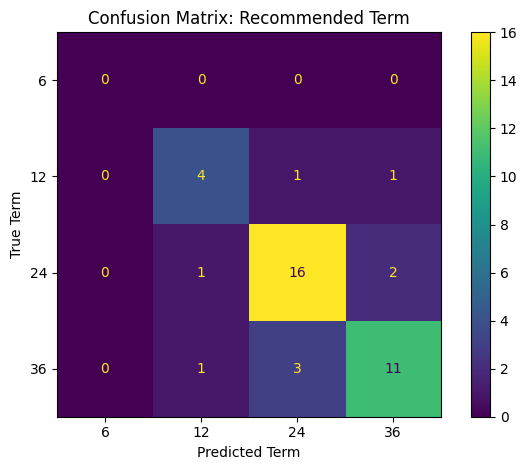

Feature importances (sorted):

                       feature  importance
             total_taken_loans    0.301478
                  total_assets    0.241856
                  active_loans    0.072946
                total_expenses    0.060980
                monthly_income    0.059803
                       n_loans    0.056029
recommended_loan_option_loan_4    0.051501
                  avg_interest    0.049545
recommended_loan_option_loan_3    0.037310
recommended_loan_option_loan_1    0.032767
recommended_loan_option_loan_5    0.019116
recommended_loan_option_loan_2    0.016670
                 annual_income    0.000000


c:\Users\Administrator\Desktop\projects\thabo motlakase\.venv\Lib\site-packages\sklearn\model_selection\_split.py:805: UserWarning: The least populated class in y has only 3 members, which is less than n_splits=5.
  warnings.warn(



Stratified CV accuracy scores per fold: [0.9   0.95  0.925 0.9   0.825]
Mean stratified CV accuracy: 0.900


In [10]:
import numpy as np
import pandas as pd
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
from sklearn.model_selection import StratifiedKFold, cross_val_score
import matplotlib.pyplot as plt

# ---------------------------------------------------------
# 1. Assume clf_search is your fitted RandomizedSearchCV for classification,
#    and X_test, y_term_test, term_encoder are already defined from earlier steps.
# ---------------------------------------------------------

# Predict on the test set
y_term_pred_enc = clf_search.predict(X_test)
y_term_pred = term_encoder.inverse_transform(y_term_pred_enc)

# 1. Confusion Matrix
cm = confusion_matrix(y_term_test, y_term_pred, labels=term_encoder.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=cm,
                              display_labels=term_encoder.classes_)

plt.figure(figsize=(6, 6))
disp.plot(values_format='d', cmap=None)  # Default matplotlib colormap
plt.title("Confusion Matrix: Recommended Term")
plt.xlabel("Predicted Term")
plt.ylabel("True Term")
plt.tight_layout()
plt.show()


# ---------------------------------------------------------
# 2. Feature Importances from the best XGBClassifier
# ---------------------------------------------------------
# Extract the trained XGBClassifier from the pipeline
best_xgb = clf_search.best_estimator_.named_steps['xgb']
feature_importances = best_xgb.feature_importances_
feature_names = X_train.columns

# Put them into a DataFrame and sort descending
importance_df = pd.DataFrame({
    'feature': feature_names,
    'importance': feature_importances
}).sort_values(by='importance', ascending=False)

print("Feature importances (sorted):\n")
print(importance_df.to_string(index=False))


# ---------------------------------------------------------
# 3. Stratified Cross‐Validation on the Entire Dataset
# ---------------------------------------------------------
# We need to encode y_term for all samples (before train/test split).
# Assume df_realistic is your full DataFrame used earlier.

from sklearn.preprocessing import LabelEncoder

# Re‐encode the full recommended_term column
full_term_encoder = LabelEncoder()
y_term_all_enc = full_term_encoder.fit_transform(df_realistic['recommended_term'])
X_all = pd.get_dummies(
    df_realistic.drop(['recommended_amount', 'recommended_term'], axis=1),
    columns=['recommended_loan_option'],
    drop_first=True
)

# Rebuild the same pipeline using the best hyperparameters found:
from xgboost import XGBClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline

best_params = clf_search.best_params_

clf_best_pipeline = Pipeline([
    ('scaler', StandardScaler()),
    ('xgb', XGBClassifier(
        objective='multi:softmax',
        num_class=len(full_term_encoder.classes_),
        random_state=42,
        n_estimators=best_params['xgb__n_estimators'],
        max_depth=best_params['xgb__max_depth'],
        learning_rate=best_params['xgb__learning_rate'],
        subsample=best_params['xgb__subsample']
    ))
])

# Stratified K‑Fold (5 folds)
skf = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

cv_scores = cross_val_score(
    clf_best_pipeline,
    X_all,
    y_term_all_enc,
    cv=skf,
    scoring='accuracy',
    n_jobs=-1
)

print("\nStratified CV accuracy scores per fold:", cv_scores)
print("Mean stratified CV accuracy: {:.3f}".format(cv_scores.mean()))


In [12]:
import joblib

# Assume you have already fit:
#   reg_search = RandomizedSearchCV(...).fit(X_train, y_amount_train)
#   clf_search = RandomizedSearchCV(...).fit(X_train, y_term_train_enc)

# 1. Extract the best‐fitting pipelines:
best_reg_pipeline = reg_search.best_estimator_
best_clf_pipeline = clf_search.best_estimator_

# 2. Save each to a .pkl file:
joblib.dump(best_reg_pipeline, "reg_model.pkl")
print("Saved regression pipeline to reg_model.pkl")

joblib.dump(best_clf_pipeline, "clf_model.pkl")
print("Saved classification pipeline to clf_model.pkl")


Saved regression pipeline to reg_model.pkl
Saved classification pipeline to clf_model.pkl


In [13]:
reg_pipeline = joblib.load("reg_model.pkl")
clf_pipeline = joblib.load("clf_model.pkl")


In [14]:
# After loading models, generate 10 loan options and recommend based on user finance data

import pandas as pd
import numpy as np
import joblib
from sklearn.preprocessing import LabelEncoder

# 1. Load the saved pipelines
reg_pipeline = joblib.load("reg_model.pkl")
clf_pipeline = joblib.load("clf_model.pkl")

# 2. Re-create the same term_encoder used during training
#    Assuming terms were [6, 12, 24, 36]
term_encoder = LabelEncoder().fit(np.array([6, 12, 24, 36]))

# 3. Define 10 loan options data
#    Columns: name_of_company, interest (annual), min_amount, max_amount, payment_term (months)
loan_options = pd.DataFrame([
    {"name_of_company": "Molefe Finance",     "interest": 0.12, "min_amount": 1000,  "max_amount": 10000,  "payment_term": 6},
    {"name_of_company": "Thaba Limo Loans",    "interest": 0.15, "min_amount": 2000,  "max_amount": 15000,  "payment_term": 12},
    {"name_of_company": "Lesotho AgriCredit",  "interest": 0.10, "min_amount": 500,   "max_amount": 8000,   "payment_term": 6},
    {"name_of_company": "Maluti Microloan",    "interest": 0.18, "min_amount": 1000,  "max_amount": 20000,  "payment_term": 24},
    {"name_of_company": "Moshoeshoe Capital",  "interest": 0.20, "min_amount": 5000,  "max_amount": 30000,  "payment_term": 36},
    {"name_of_company": "Pipen Tech Finance",  "interest": 0.11, "min_amount": 1500,  "max_amount": 12000,  "payment_term": 12},
    {"name_of_company": "Sotho SmallBiz",      "interest": 0.22, "min_amount": 3000,  "max_amount": 25000,  "payment_term": 24},
    {"name_of_company": "Lesotho Growth Fund", "interest": 0.14, "min_amount": 2000,  "max_amount": 18000,  "payment_term": 12},
    {"name_of_company": "Lerotholi Lending",   "interest": 0.19, "min_amount": 800,   "max_amount": 9000,   "payment_term": 6},
    {"name_of_company": "Malefetsane Loans",   "interest": 0.13, "min_amount": 2500,  "max_amount": 22000,  "payment_term": 36},
])

# 4. Example user finance data (as provided)
user_finance = pd.DataFrame([
    {"monthly_income": 5245.0, "annual_income": 62941.0, "total_assets": 200000.0, "total_expenses": 55456.0,
     "total_taken_loans": 12634.0, "active_loans": 8342.0, "avg_interest": 0.163, "n_loans": 5},
    {"monthly_income": 4293.0, "annual_income": 51511.0, "total_assets": 153583.0, "total_expenses": 30260.0,
     "total_taken_loans": 16464.0, "active_loans": 11918.0, "avg_interest": 0.211, "n_loans": 2},
    {"monthly_income": 5472.0, "annual_income": 65658.0, "total_assets": 190017.0, "total_expenses": 35643.0,
     "total_taken_loans": 23447.0, "active_loans": 13179.0, "avg_interest": 0.136, "n_loans": 2},
    {"monthly_income": 6785.0, "annual_income": 81415.0, "total_assets": 200000.0, "total_expenses": 67924.0,
     "total_taken_loans": 17051.0, "active_loans": 9766.0, "avg_interest": 0.117, "n_loans": 3},
    {"monthly_income": 4149.0, "annual_income": 49785.0, "total_assets": 110473.0, "total_expenses": 25480.0,
     "total_taken_loans": 18993.0, "active_loans": 16043.0, "avg_interest": 0.153, "n_loans": 5},
])

# 5. For each user, predict recommended_amount and recommended_term, then filter loan_options
def recommend_loans_for_user(user_row):
    # Predict recommended amount using regression pipeline
    X_user = pd.DataFrame([user_row.values], columns=user_row.index)
    
    # We need dummy columns for recommended_loan_option during prediction.
    # Since our model was trained with loan options loan_0..loan_5 (drop_first),
    # but here we only need amount and term which do not depend on loan_option for new users.
    # We can add zero columns for each dummy that was used in training.
    for i in range(1, 6):
        X_user[f"recommended_loan_option_loan_{i}"] = 0
    
    pred_amount = reg_pipeline.predict(X_user)[0]
    
    # Predict term
    pred_term_enc = clf_pipeline.predict(X_user)[0]
    pred_term = term_encoder.inverse_transform([pred_term_enc])[0]
    
    # Filter loan_options where:
    #  - payment_term matches pred_term
    #  - min_amount <= pred_amount <= max_amount
    df_candidates = loan_options[
        (loan_options["payment_term"] == pred_term) &
        (loan_options["min_amount"] <= pred_amount) &
        (loan_options["max_amount"] >= pred_amount)
    ].copy()
    
    # If no candidates match exactly, relax to only term match
    if df_candidates.empty:
        df_candidates = loan_options[loan_options["payment_term"] == pred_term].copy()
    
    # Compute monthly payment for each candidate: (amount * (1 + interest)) / term
    df_candidates["predicted_amount"] = round(pred_amount, 0)
    df_candidates["predicted_term"] = pred_term
    df_candidates["monthly_payment"] = ((pred_amount * (1 + user_row["avg_interest"])) / pred_term).round(0)
    
    # Sort by lowest monthly_payment
    df_candidates = df_candidates.sort_values(by="monthly_payment", ascending=True).reset_index(drop=True)
    return df_candidates[[
        "name_of_company", "interest", "min_amount", "max_amount", "payment_term",
        "predicted_amount", "predicted_term", "monthly_payment"
    ]]

# 6. Loop through all users and print recommendations
for idx, user in user_finance.iterrows():
    print(f"=== Recommendations for User #{idx + 1} ===")
    recs = recommend_loans_for_user(user)
    if recs.empty:
        print("No loan options match the predicted criteria.\n")
    else:
        print(recs.to_string(index=False))
    print("\n")


=== Recommendations for User #1 ===
   name_of_company  interest  min_amount  max_amount  payment_term  predicted_amount  predicted_term  monthly_payment
Moshoeshoe Capital       0.2        5000       30000            36           24578.0              36            794.0


=== Recommendations for User #2 ===
   name_of_company  interest  min_amount  max_amount  payment_term  predicted_amount  predicted_term  monthly_payment
Moshoeshoe Capital      0.20        5000       30000            36           19144.0              36            644.0
 Malefetsane Loans      0.13        2500       22000            36           19144.0              36            644.0


=== Recommendations for User #3 ===
   name_of_company  interest  min_amount  max_amount  payment_term  predicted_amount  predicted_term  monthly_payment
Moshoeshoe Capital       0.2        5000       30000            36           22129.0              36            698.0


=== Recommendations for User #4 ===
   name_of_company  inte

In [15]:
import numpy as np
import pandas as pd
import joblib
from sklearn.preprocessing import LabelEncoder

# ----------------------------
# 1. LOAD THE SAVED MODELS
# ----------------------------
# Make sure you have already saved these with joblib.dump(...)
#   - reg_model.pkl  (the regression Pipeline)
#   - clf_model.pkl  (the classification Pipeline)

reg_pipeline = joblib.load("reg_model.pkl")
clf_pipeline = joblib.load("clf_model.pkl")
print("Models loaded successfully.")

# ----------------------------
# 2. RECREATE THE TERM ENCODER
# ----------------------------
# We originally trained the classifier with terms [6, 12, 24, 36].
term_encoder = LabelEncoder().fit(np.array([6, 12, 24, 36]))

# ----------------------------
# 3. DEFINE THE 10 LOAN OPTIONS
# ----------------------------
loan_options = pd.DataFrame([
    {"name_of_company": "Molefe Finance",     "interest": 0.12, "min_amount": 1000,  "max_amount": 10000,  "payment_term": 6},
    {"name_of_company": "Thaba Limo Loans",    "interest": 0.15, "min_amount": 2000,  "max_amount": 15000,  "payment_term": 12},
    {"name_of_company": "Lesotho AgriCredit",  "interest": 0.10, "min_amount": 500,   "max_amount": 8000,   "payment_term": 6},
    {"name_of_company": "Maluti Microloan",    "interest": 0.18, "min_amount": 1000,  "max_amount": 20000,  "payment_term": 24},
    {"name_of_company": "Moshoeshoe Capital",  "interest": 0.20, "min_amount": 5000,  "max_amount": 30000,  "payment_term": 36},
    {"name_of_company": "Pipen Tech Finance",  "interest": 0.11, "min_amount": 1500,  "max_amount": 12000,  "payment_term": 12},
    {"name_of_company": "Sotho SmallBiz",      "interest": 0.22, "min_amount": 3000,  "max_amount": 25000,  "payment_term": 24},
    {"name_of_company": "Lesotho Growth Fund", "interest": 0.14, "min_amount": 2000,  "max_amount": 18000,  "payment_term": 12},
    {"name_of_company": "Lerotholi Lending",   "interest": 0.19, "min_amount": 800,   "max_amount": 9000,   "payment_term": 6},
    {"name_of_company": "Malefetsane Loans",   "interest": 0.13, "min_amount": 2500,  "max_amount": 22000,  "payment_term": 36},
])

# ----------------------------
# 4. DEFINE YOUR SINGLE USER DATA
# ----------------------------
# Suppose this is the individual's financial profile:
user_profile = {
    "monthly_income":    5245.0,
    "annual_income":     62941.0,
    "total_assets":      200000.0,
    "total_expenses":    55456.0,
    "total_taken_loans": 12634.0,
    "active_loans":      8342.0,
    "avg_interest":      0.163,
    "n_loans":           5
}

# Convert to a DataFrame row for compatibility with pipeline
X_user = pd.DataFrame([user_profile])

# In our training pipeline, we used one‐hot columns for “recommended_loan_option_loan_1” through “recommended_loan_option_loan_5”
# (loan_0 was the dropped baseline). Here, since we're only predicting amount & term, we can set all dummies = 0.
for i in range(1, 6):
    X_user[f"recommended_loan_option_loan_{i}"] = 0

# ----------------------------
# 5. PREDICT RECOMMENDED AMOUNT & TERM
# ----------------------------
pred_amount = reg_pipeline.predict(X_user)[0]
pred_term_enc = clf_pipeline.predict(X_user)[0]
pred_term = term_encoder.inverse_transform([pred_term_enc])[0]

print(f"\nPredicted Loan Amount: {pred_amount:.0f} M")
print(f"Predicted Payment Term: {pred_term} months\n")

# ----------------------------
# 6. FILTER AND RANK LOAN OPTIONS
# ----------------------------
# Filter those with matching term and within [min_amount, max_amount]
candidates = loan_options[
    (loan_options["payment_term"] == pred_term) &
    (loan_options["min_amount"] <= pred_amount) &
    (loan_options["max_amount"] >= pred_amount)
].copy()

# If none exactly match, keep all with matching term
if candidates.empty:
    candidates = loan_options[loan_options["payment_term"] == pred_term].copy()

# Compute monthly payment based on user’s avg_interest:
#    monthly_payment = (pred_amount * (1 + avg_interest)) / pred_term
monthly_payment = (pred_amount * (1 + user_profile["avg_interest"])) / pred_term
candidates["predicted_amount"] = round(pred_amount, 0)
candidates["predicted_term"] = pred_term
candidates["monthly_payment"] = round(monthly_payment, 0)

# Sort by lowest monthly_payment (best deal first)
candidates = candidates.sort_values(by="monthly_payment", ascending=True).reset_index(drop=True)

# ----------------------------
# 7. PRINT THE FINAL RECOMMENDATIONS
# ----------------------------
print("=== Loan Recommendations for You ===")
print(candidates[[
    "name_of_company",
    "interest",
    "min_amount",
    "max_amount",
    "payment_term",
    "predicted_amount",
    "predicted_term",
    "monthly_payment"
]].to_string(index=False))


Models loaded successfully.

Predicted Loan Amount: 24578 M
Predicted Payment Term: 36 months

=== Loan Recommendations for You ===
   name_of_company  interest  min_amount  max_amount  payment_term  predicted_amount  predicted_term  monthly_payment
Moshoeshoe Capital       0.2        5000       30000            36           24578.0              36            794.0


In [16]:
import pandas as pd
import numpy as np

# --------------------------------------
# 1) YOUR SINGLE USER PROFILE
# --------------------------------------
user_profile = {
    "monthly_income":    5245.0,
    "annual_income":     62941.0,
    "total_assets":      200000.0,
    "total_expenses":    55456.0,
    "total_taken_loans": 12634.0,
    "active_loans":      8342.0,
    "avg_interest":      0.163,
    "n_loans":           5
}

# For convenience, convert to a pandas Series
user = pd.Series(user_profile)

# --------------------------------------
# 2) COMPUTE “PREDICTED” AMOUNT & TERM (SYNTHETIC LOGIC)
# --------------------------------------
# 2a) recommended_amount = 0.10*total_assets + 0.05*annual_income
pred_amount = 0.10 * user["total_assets"] + 0.05 * user["annual_income"]
pred_amount = float(pred_amount)  # e.g., 0.10*200k + 0.05*62941 = 20000 + 3147.05 = 23147.05

# 2b) recommended_term based on debt_to_asset
debt_to_asset = user["total_taken_loans"] / user["total_assets"]

if debt_to_asset < 0.3:
    pred_term = 36
elif debt_to_asset < 0.6:
    pred_term = 24
else:
    pred_term = 12

# --------------------------------------
# 3) DEFINE THE 10 LOAN OPTIONS
# --------------------------------------
loan_options = pd.DataFrame([
    {"name_of_company": "Molefe Finance",     "interest": 0.12, "min_amount": 1000,  "max_amount": 10000,  "payment_term": 6},
    {"name_of_company": "Thaba Limo Loans",    "interest": 0.15, "min_amount": 2000,  "max_amount": 15000,  "payment_term": 12},
    {"name_of_company": "Lesotho AgriCredit",  "interest": 0.10, "min_amount": 500,   "max_amount": 8000,   "payment_term": 6},
    {"name_of_company": "Maluti Microloan",    "interest": 0.18, "min_amount": 1000,  "max_amount": 20000,  "payment_term": 24},
    {"name_of_company": "Moshoeshoe Capital",  "interest": 0.20, "min_amount": 5000,  "max_amount": 30000,  "payment_term": 36},
    {"name_of_company": "Pipen Tech Finance",  "interest": 0.11, "min_amount": 1500,  "max_amount": 12000,  "payment_term": 12},
    {"name_of_company": "Sotho SmallBiz",      "interest": 0.22, "min_amount": 3000,  "max_amount": 25000,  "payment_term": 24},
    {"name_of_company": "Lesotho Growth Fund", "interest": 0.14, "min_amount": 2000,  "max_amount": 18000,  "payment_term": 12},
    {"name_of_company": "Lerotholi Lending",   "interest": 0.19, "min_amount": 800,   "max_amount": 9000,   "payment_term": 6},
    {"name_of_company": "Malefetsane Loans",   "interest": 0.13, "min_amount": 2500,  "max_amount": 22000,  "payment_term": 36},
])

# --------------------------------------
# 4) FILTER LOANS THAT MATCH THE PREDICTED TERM & AMOUNT RANGE
# --------------------------------------
candidates = loan_options[
    (loan_options["payment_term"] == pred_term) &
    (loan_options["min_amount"] <= pred_amount) &
    (loan_options["max_amount"] >= pred_amount)
].copy()

# If none match both criteria exactly, fall back to “term only”
if candidates.empty:
    candidates = loan_options[loan_options["payment_term"] == pred_term].copy()

# --------------------------------------
# 5) COMPUTE A “MONTHLY PAYMENT” SCORE FOR EACH CANDIDATE
#    We’ll use:
#      monthly_payment = (pred_amount * (1 + loan_interest)) / pred_term
#    (i.e. spread the principal + interest equally over each month)
# --------------------------------------
candidates["predicted_amount"] = round(pred_amount, 0)
candidates["predicted_term"] = pred_term
candidates["monthly_payment"] = (
    (pred_amount * (1 + candidates["interest"])) / pred_term
).round(0)

# --------------------------------------
# 6) SORT BY ASCENDING monthly_payment (BEST DEAL FIRST)
# --------------------------------------
candidates = candidates.sort_values(by="monthly_payment", ascending=True).reset_index(drop=True)

# --------------------------------------
# 7) PRINT THE FINAL RECOMMENDATIONS
# --------------------------------------
print(f"\n=== YOUR PROFILE ===\n{user.to_frame().T}\n")
print(f"Predicted Loan Amount: {pred_amount:.0f} M")
print(f"Predicted Payment Term: {pred_term} months\n")

print("=== LOAN OPTIONS (BEST‐DEAL FIRST) ===")
print(
    candidates[
        ["name_of_company", "interest", "min_amount", "max_amount",
         "payment_term", "predicted_amount", "predicted_term", "monthly_payment"]
    ].to_string(index=False)
)



=== YOUR PROFILE ===
   monthly_income  annual_income  total_assets  total_expenses  \
0          5245.0        62941.0      200000.0         55456.0   

   total_taken_loans  active_loans  avg_interest  n_loans  
0            12634.0        8342.0         0.163      5.0  

Predicted Loan Amount: 23147 M
Predicted Payment Term: 36 months

=== LOAN OPTIONS (BEST‐DEAL FIRST) ===
   name_of_company  interest  min_amount  max_amount  payment_term  predicted_amount  predicted_term  monthly_payment
Moshoeshoe Capital       0.2        5000       30000            36           23147.0              36            772.0


In [2]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error
from sklearn.metrics import precision_score, recall_score, f1_score
from xgboost import XGBRegressor, XGBClassifier
from sklearn.model_selection import RandomizedSearchCV
import joblib

# 1. Define loan options (unchanged)
loan_options = pd.DataFrame([
    {"name_of_company": "Molefe Finance", "interest": 0.12, "min_amount": 1000, "max_amount": 10000, "payment_term": 6},
    {"name_of_company": "Thaba Limo Loans", "interest": 0.15, "min_amount": 2000, "max_amount": 15000, "payment_term": 12},
    {"name_of_company": "Lesotho AgriCredit", "interest": 0.10, "min_amount": 500, "max_amount": 8000, "payment_term": 6},
    {"name_of_company": "Maluti Microloan", "interest": 0.18, "min_amount": 1000, "max_amount": 20000, "payment_term": 24},
    {"name_of_company": "Moshoeshoe Capital", "interest": 0.20, "min_amount": 5000, "max_amount": 30000, "payment_term": 36},
    {"name_of_company": "Pipen Tech Finance", "interest": 0.11, "min_amount": 1500, "max_amount": 12000, "payment_term": 12},
    {"name_of_company": "Sotho SmallBiz", "interest": 0.22, "min_amount": 3000, "max_amount": 25000, "payment_term": 24},
    {"name_of_company": "Lesotho Growth Fund", "interest": 0.14, "min_amount": 2000, "max_amount": 18000, "payment_term": 12},
    {"name_of_company": "Lerotholi Lending", "interest": 0.19, "min_amount": 800, "max_amount": 9000, "payment_term": 6},
    {"name_of_company": "Malefetsane Loans", "interest": 0.13, "min_amount": 2500, "max_amount": 22000, "payment_term": 36},
])

# 2. Generate synthetic user profiles
np.random.seed(42)
n_samples = 1000  # Increased dataset size

# Use log-normal for more realistic financial distributions
monthly_income = np.random.lognormal(mean=np.log(4500), sigma=0.5, size=n_samples).clip(min=1500, max=15000)
annual_income = monthly_income * 12
total_assets = (annual_income * np.random.uniform(1.5, 3.5, size=n_samples)).clip(min=20000, max=200000)
total_expenses = (annual_income * np.random.uniform(0.4, 0.9, size=n_samples)).clip(min=10000, max=0.8*annual_income)
total_taken_loans = np.random.lognormal(mean=np.log(20000), sigma=0.6, size=n_samples).clip(min=5000, max=80000)
active_loans = total_taken_loans * np.random.uniform(0.5, 0.9, size=n_samples)
avg_interest = np.random.uniform(0.10, 0.25, size=n_samples)
n_loans = np.random.randint(1, 6, size=n_samples)

base_df = pd.DataFrame({
    "monthly_income": monthly_income.round(0),
    "annual_income": annual_income.round(0),
    "total_assets": total_assets.round(0),
    "total_expenses": total_expenses.round(0),
    "total_taken_loans": total_taken_loans.round(0),
    "active_loans": active_loans.round(0),
    "avg_interest": avg_interest.round(3),
    "n_loans": n_loans
})

# 3. Feature engineering
base_df["debt_to_income"] = base_df["total_taken_loans"] / base_df["annual_income"]
base_df["disposable_income"] = base_df["monthly_income"] - base_df["total_expenses"] / 12
base_df["loan_to_asset"] = base_df["active_loans"] / base_df["total_assets"]

# 4. Compute recommended_term based on multiple factors
debt_to_asset = base_df["total_taken_loans"] / base_df["total_assets"]
debt_to_income = base_df["debt_to_income"]
terms = np.where((debt_to_asset < 0.3) & (debt_to_income < 0.5), 36,
         np.where((debt_to_asset < 0.6) & (debt_to_income < 1.0), 24, 12))
base_df["recommended_term"] = terms

# 5. Compute recommended_amount based on financials
rec_amounts = []
rec_loan_option = []
grouped = loan_options.groupby("payment_term")

for idx, row in base_df.iterrows():
    term = int(row["recommended_term"])
    possible = grouped.get_group(term).reset_index(drop=True)
    choice = possible.sample(n=1).iloc[0]
    rec_loan_option.append(choice["name_of_company"])
    # Tie amount to disposable income and assets with noise
    base_amount = min(row["disposable_income"] * 12 * 0.5, row["total_assets"] * 0.2)
    amount = np.random.uniform(max(base_amount * 0.8, choice["min_amount"]),
                              min(base_amount * 1.2, choice["max_amount"]))
    rec_amounts.append(amount)

base_df["recommended_amount"] = np.round(rec_amounts, 0)
base_df["recommended_loan_option"] = rec_loan_option

# 6. Prepare features (exclude recommended_loan_option)
X = base_df.drop(["recommended_amount", "recommended_term", "recommended_loan_option"], axis=1)
y_amount = base_df["recommended_amount"]
y_term = base_df["recommended_term"]

# 7. Train-test split
X_train, X_test, y_amount_train, y_amount_test, y_term_train, y_term_test = train_test_split(
    X, y_amount, y_term, test_size=0.2, random_state=42
)

# 8. Train Regression Model
reg_pipe = Pipeline([
    ("scaler", StandardScaler()),
    ("xgb", XGBRegressor(objective="reg:squarederror", random_state=42))
])
reg_params = {
    "xgb__n_estimators": [100, 200, 300],
    "xgb__max_depth": [3, 5, 7],
    "xgb__learning_rate": [0.01, 0.05, 0.1],
    "xgb__subsample": [0.7, 0.8, 1.0],
    "xgb__colsample_bytree": [0.7, 0.8, 1.0]
}
reg_search = RandomizedSearchCV(reg_pipe, reg_params, n_iter=10, cv=5, n_jobs=-1,
                                scoring="neg_mean_squared_error", random_state=42)
reg_search.fit(X_train, y_amount_train)

# Evaluate regression
y_amount_pred = reg_search.predict(X_test)
r2 = r2_score(y_amount_test, y_amount_pred)
mae = mean_absolute_error(y_amount_test, y_amount_pred)
rmse = np.sqrt(mean_squared_error(y_amount_test, y_amount_pred))
print(f"Regression R2: {r2:.4f}")
print(f"Regression MAE: {mae:.2f}")
print(f"Regression RMSE: {rmse:.2f}")

# 9. Train Classification Model
term_encoder = LabelEncoder()
y_term_train_enc = term_encoder.fit_transform(y_term_train)
y_term_test_enc = term_encoder.transform(y_term_test)

clf_pipe = Pipeline([
    ("scaler", StandardScaler()),
    ("xgb", XGBClassifier(objective="multi:softmax", num_class=len(term_encoder.classes_), random_state=42))
])
clf_params = {
    "xgb__n_estimators": [100, 200, 300],
    "xgb__max_depth": [3, 5, 7],
    "xgb__learning_rate": [0.01, 0.05, 0.1],
    "xgb__subsample": [0.7, 0.8, 1.0],
    "xgb__colsample_bytree": [0.7, 0.8, 1.0]
}
clf_search = RandomizedSearchCV(clf_pipe, clf_params, n_iter=10, cv=5, n_jobs=-1,
                                scoring="accuracy", random_state=42)
clf_search.fit(X_train, y_term_train_enc)

# Evaluate classification
y_term_pred = clf_search.predict(X_test)
accuracy = clf_search.score(X_test, y_term_test_enc)
precision = precision_score(y_term_test_enc, y_term_pred, average="weighted")
recall = recall_score(y_term_test_enc, y_term_pred, average="weighted")
f1 = f1_score(y_term_test_enc, y_term_pred, average="weighted")
print(f"Classification Accuracy: {accuracy:.4f}")
print(f"Classification Precision: {precision:.4f}")
print(f"Classification Recall: {recall:.4f}")
print(f"Classification F1-Score: {f1:.4f}")

# 10. Feature importance for regression
feature_importance = reg_search.best_estimator_.named_steps["xgb"].feature_importances_
importance_df = pd.DataFrame({"Feature": X.columns, "Importance": feature_importance})
print("\nRegression Feature Importance:")
print(importance_df.sort_values(by="Importance", ascending=False))

# 11. Save models
joblib.dump(reg_search.best_estimator_, "reg_model_improved.pkl")
joblib.dump(clf_search.best_estimator_, "clf_model_improved.pkl")
print("Saved improved models as 'reg_model_improved.pkl' and 'clf_model_improved.pkl'")

Regression R2: 0.9528
Regression MAE: 1023.60
Regression RMSE: 1298.01
Classification Accuracy: 0.9950
Classification Precision: 0.9950
Classification Recall: 0.9950
Classification F1-Score: 0.9950

Regression Feature Importance:
              Feature  Importance
9   disposable_income    0.465339
0      monthly_income    0.339047
2        total_assets    0.091710
3      total_expenses    0.041022
1       annual_income    0.013578
7             n_loans    0.011345
6        avg_interest    0.009773
8      debt_to_income    0.009634
5        active_loans    0.007852
4   total_taken_loans    0.006457
10      loan_to_asset    0.004242
Saved improved models as 'reg_model_improved.pkl' and 'clf_model_improved.pkl'


In [5]:
from sklearn.metrics import classification_report
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error
from sklearn.metrics import precision_score, recall_score, f1_score
from xgboost import XGBRegressor, XGBClassifier
from sklearn.model_selection import RandomizedSearchCV
import joblib

# Assuming the data generation and preprocessing steps are the same as provided
# (Repeating only the necessary parts for context)

# 1. Define loan options (unchanged)
loan_options = pd.DataFrame([
    {"name_of_company": "Molefe Finance", "interest": 0.12, "min_amount": 1000, "max_amount": 10000, "payment_term": 6},
    {"name_of_company": "Thaba Limo Loans", "interest": 0.15, "min_amount": 2000, "max_amount": 15000, "payment_term": 12},
    {"name_of_company": "Lesotho AgriCredit", "interest": 0.10, "min_amount": 500, "max_amount": 8000, "payment_term": 6},
    {"name_of_company": "Maluti Microloan", "interest": 0.18, "min_amount": 1000, "max_amount": 20000, "payment_term": 24},
    {"name_of_company": "Moshoeshoe Capital", "interest": 0.20, "min_amount": 5000, "max_amount": 30000, "payment_term": 36},
    {"name_of_company": "Pipen Tech Finance", "interest": 0.11, "min_amount": 1500, "max_amount": 12000, "payment_term": 12},
    {"name_of_company": "Sotho SmallBiz", "interest": 0.22, "min_amount": 3000, "max_amount": 25000, "payment_term": 24},
    {"name_of_company": "Lesotho Growth Fund", "interest": 0.14, "min_amount": 2000, "max_amount": 18000, "payment_term": 12},
    {"name_of_company": "Lerotholi Lending", "interest": 0.19, "min_amount": 800, "max_amount": 9000, "payment_term": 6},
    {"name_of_company": "Malefetsane Loans", "interest": 0.13, "min_amount": 2500, "max_amount": 22000, "payment_term": 36},
])

# 2. Generate synthetic user profiles
np.random.seed(42)
n_samples = 1000
monthly_income = np.random.lognormal(mean=np.log(4500), sigma=0.5, size=n_samples).clip(min=1500, max=15000)
annual_income = monthly_income * 12
total_assets = (annual_income * np.random.uniform(1.5, 3.5, size=n_samples)).clip(min=20000, max=200000)
total_expenses = (annual_income * np.random.uniform(0.4, 0.9, size=n_samples)).clip(min=10000, max=0.8*annual_income)
total_taken_loans = np.random.lognormal(mean=np.log(20000), sigma=0.6, size=n_samples).clip(min=5000, max=80000)
active_loans = total_taken_loans * np.random.uniform(0.5, 0.9, size=n_samples)
avg_interest = np.random.uniform(0.10, 0.25, size=n_samples)
n_loans = np.random.randint(1, 6, size=n_samples)

base_df = pd.DataFrame({
    "monthly_income": monthly_income.round(0),
    "annual_income": annual_income.round(0),
    "total_assets": total_assets.round(0),
    "total_expenses": total_expenses.round(0),
    "total_taken_loans": total_taken_loans.round(0),
    "active_loans": active_loans.round(0),
    "avg_interest": avg_interest.round(3),
    "n_loans": n_loans
})

# 3. Feature engineering
base_df["debt_to_income"] = base_df["total_taken_loans"] / base_df["annual_income"]
base_df["disposable_income"] = base_df["monthly_income"] - base_df["total_expenses"] / 12
base_df["loan_to_asset"] = base_df["active_loans"] / base_df["total_assets"]

# 4. Compute recommended_term
debt_to_asset = base_df["total_taken_loans"] / base_df["total_assets"]
debt_to_income = base_df["debt_to_income"]
terms = np.where((debt_to_asset < 0.3) & (debt_to_income < 0.5), 36,
                 np.where((debt_to_asset < 0.6) & (debt_to_income < 1.0), 24, 12))
base_df["recommended_term"] = terms

# 5. Compute recommended_amount
rec_amounts = []
rec_loan_option = []
grouped = loan_options.groupby("payment_term")

for idx, row in base_df.iterrows():
    term = int(row["recommended_term"])
    possible = grouped.get_group(term).reset_index(drop=True)
    choice = possible.sample(n=1).iloc[0]
    rec_loan_option.append(choice["name_of_company"])
    base_amount = min(row["disposable_income"] * 12 * 0.5, row["total_assets"] * 0.2)
    amount = np.random.uniform(max(base_amount * 0.8, choice["min_amount"]),
                              min(base_amount * 1.2, choice["max_amount"]))
    rec_amounts.append(amount)

base_df["recommended_amount"] = np.round(rec_amounts, 0)
base_df["recommended_loan_option"] = rec_loan_option

# 6. Prepare features
X = base_df.drop(["recommended_amount", "recommended_term", "recommended_loan_option"], axis=1)
y_amount = base_df["recommended_amount"]
y_term = base_df["recommended_term"]

# 7. Train-test split
X_train, X_test, y_amount_train, y_amount_test, y_term_train, y_term_test = train_test_split(
    X, y_amount, y_term, test_size=0.2, random_state=42
)

# 8. Train Classification Model
term_encoder = LabelEncoder()
y_term_train_enc = term_encoder.fit_transform(y_term_train)
y_term_test_enc = term_encoder.transform(y_term_test)

clf_pipe = Pipeline([
    ("scaler", StandardScaler()),
    ("xgb", XGBClassifier(objective="multi:softmax", num_class=len(term_encoder.classes_), random_state=42))
])
clf_params = {
    "xgb__n_estimators": [100, 200, 300],
    "xgb__max_depth": [3, 5, 7],
    "xgb__learning_rate": [0.01, 0.05, 0.1],
    "xgb__subsample": [0.7, 0.8, 1.0],
    "xgb__colsample_bytree": [0.7, 0.8, 1.0]
}
clf_search = RandomizedSearchCV(clf_pipe, clf_params, n_iter=10, cv=5, n_jobs=-1,
                                scoring="accuracy", random_state=42)
clf_search.fit(X_train, y_term_train_enc)

# 9. Generate Classification Report
y_term_pred = clf_search.predict(X_test)
accuracy = clf_search.score(X_test, y_term_test_enc)
# Map encoded labels back to original terms (12, 24, 36)
class_names = term_encoder.inverse_transform(range(len(term_encoder.classes_)))
report = classification_report(y_term_test_enc, y_term_pred, target_names=[str(name) for name in class_names])
print("Classification Report:\n", report)
print(f"Classification Accuracy: {accuracy:.4f}")

Classification Report:
               precision    recall  f1-score   support

          12       1.00      1.00      1.00        27
          24       1.00      0.98      0.99        51
          36       0.99      1.00      1.00       122

    accuracy                           0.99       200
   macro avg       1.00      0.99      1.00       200
weighted avg       1.00      0.99      0.99       200

Classification Accuracy: 0.9950


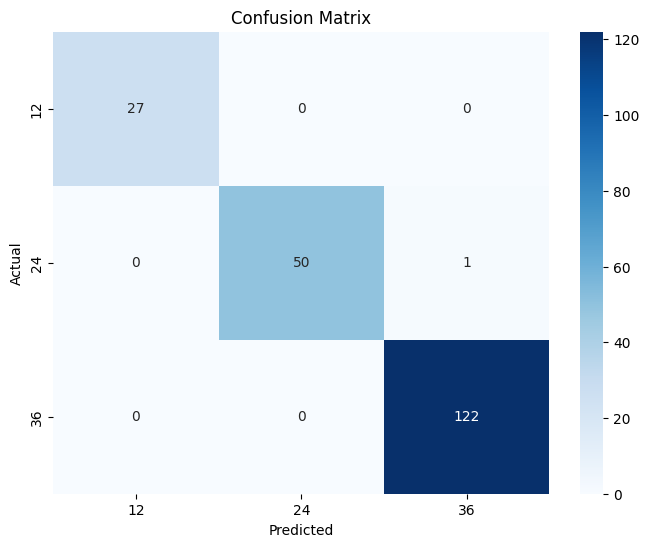

In [7]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

cm = confusion_matrix(y_term_test_enc, y_term_pred)
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", 
            xticklabels=class_names, yticklabels=class_names)
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix")
plt.show()

Classification Report:
               precision    recall  f1-score   support

          12       1.00      1.00      1.00        27
          24       1.00      0.98      0.99        51
          36       0.99      1.00      1.00       122

    accuracy                           0.99       200
   macro avg       1.00      0.99      1.00       200
weighted avg       1.00      0.99      0.99       200

Classification Accuracy: 0.9950


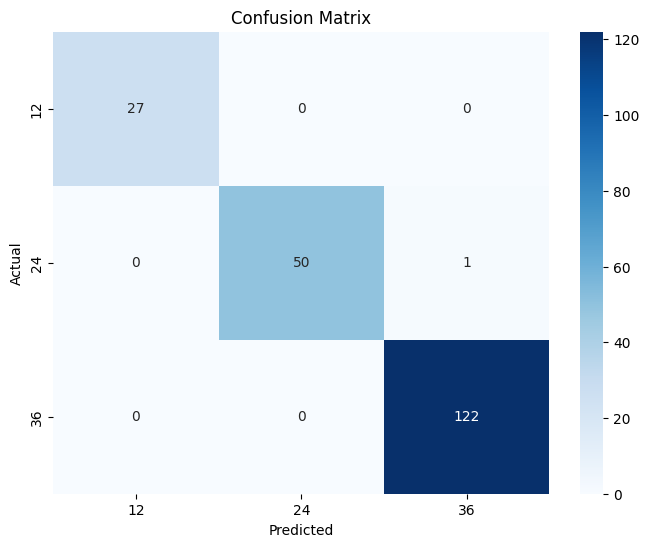

Classification CV Scores: [0.99125 0.99125 0.99    0.9925  0.9925  0.9925  0.99125 0.99    0.9925
 0.99   ]
Best CV Score: 0.9925
Saved improved classification model as 'clf_model_improved1.pkl'


In [ ]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.metrics import classification_report, confusion_matrix
from xgboost import XGBClassifier
from sklearn.model_selection import RandomizedSearchCV
import joblib
import seaborn as sns
import matplotlib.pyplot as plt

# 1. Define loan options (unchanged)
loan_options = pd.DataFrame([
    {"name_of_company": "Molefe Finance", "interest": 0.12, "min_amount": 1000, "max_amount": 10000, "payment_term": 6},
    {"name_of_company": "Thaba Limo Loans", "interest": 0.15, "min_amount": 2000, "max_amount": 15000, "payment_term": 12},
    {"name_of_company": "Lesotho AgriCredit", "interest": 0.10, "min_amount": 500, "max_amount": 8000, "payment_term": 6},
    {"name_of_company": "Maluti Microloan", "interest": 0.18, "min_amount": 1000, "max_amount": 20000, "payment_term": 24},
    {"name_of_company": "Moshoeshoe Capital", "interest": 0.20, "min_amount": 5000, "max_amount": 30000, "payment_term": 36},
    {"name_of_company": "Pipen Tech Finance", "interest": 0.11, "min_amount": 1500, "max_amount": 12000, "payment_term": 12},
    {"name_of_company": "Sotho SmallBiz", "interest": 0.22, "min_amount": 3000, "max_amount": 25000, "payment_term": 24},
    {"name_of_company": "Lesotho Growth Fund", "interest": 0.14, "min_amount": 2000, "max_amount": 18000, "payment_term": 12},
    {"name_of_company": "Lerotholi Lending", "interest": 0.19, "min_amount": 800, "max_amount": 9000, "payment_term": 6},
    {"name_of_company": "Malefetsane Loans", "interest": 0.13, "min_amount": 2500, "max_amount": 22000, "payment_term": 36},
])

# 2. Generate synthetic user profiles
np.random.seed(42)
n_samples = 1000
monthly_income = np.random.lognormal(mean=np.log(4500), sigma=0.5, size=n_samples).clip(min=1500, max=15000)
annual_income = monthly_income * 12
total_assets = (annual_income * np.random.uniform(1.5, 3.5, size=n_samples)).clip(min=20000, max=200000)
total_expenses = (annual_income * np.random.uniform(0.4, 0.9, size=n_samples)).clip(min=10000, max=0.8*annual_income)
total_taken_loans = np.random.lognormal(mean=np.log(20000), sigma=0.6, size=n_samples).clip(min=5000, max=80000)
active_loans = total_taken_loans * np.random.uniform(0.5, 0.9, size=n_samples)
avg_interest = np.random.uniform(0.10, 0.25, size=n_samples)
n_loans = np.random.randint(1, 6, size=n_samples)

base_df = pd.DataFrame({
    "monthly_income": monthly_income.round(0),
    "annual_income": annual_income.round(0),
    "total_assets": total_assets.round(0),
    "total_expenses": total_expenses.round(0),
    "total_taken_loans": total_taken_loans.round(0),
    "active_loans": active_loans.round(0),
    "avg_interest": avg_interest.round(3),
    "n_loans": n_loans
})

# 3. Feature engineering
base_df["debt_to_income"] = base_df["total_taken_loans"] / base_df["annual_income"]
base_df["disposable_income"] = base_df["monthly_income"] - base_df["total_expenses"] / 12
base_df["loan_to_asset"] = base_df["active_loans"] / base_df["total_assets"]

# 4. Compute recommended_term
debt_to_asset = base_df["total_taken_loans"] / base_df["total_assets"]
debt_to_income = base_df["debt_to_income"]
terms = np.where((debt_to_asset < 0.3) & (debt_to_income < 0.5), 12,
                 np.where((debt_to_asset < 0.6) & (debt_to_income < 1.0), 24, 12))
base_df["recommended_term"] = terms

# 5. Compute recommended_amount
rec_amounts = []
rec_loan_option = []
grouped = loan_options.groupby("payment_term")

for idx, row in base_df.iterrows():
    term = int(row["recommended_term"])
    possible = grouped.get_group(term).reset_index(drop=True)
    choice = possible.sample(n=1).iloc[0]
    rec_loan_option.append(choice["name_of_company"])
    base_amount = min(row["disposable_income"] * 12 * 0.5, row["total_assets"] * 0.2)
    amount = np.random.uniform(max(base_amount * 0.8, choice["min_amount"]),
                              min(base_amount * 1.2, choice["max_amount"]))
    rec_amounts.append(amount)

base_df["recommended_amount"] = np.round(rec_amounts, 0)
base_df["recommended_loan_option"] = rec_loan_option

# 6. Prepare features
X = base_df.drop(["recommended_amount", "recommended_term", "recommended_loan_option"], axis=1)
y_amount = base_df["recommended_amount"]
y_term = base_df["recommended_term"]

# 7. Train-test split
X_train, X_test, y_amount_train, y_amount_test, y_term_train, y_term_test = train_test_split(
    X, y_amount, y_term, test_size=0.2, random_state=42
)

# 8. Train Classification Model
term_encoder = LabelEncoder()
y_term_train_enc = term_encoder.fit_transform(y_term_train)
y_term_test_enc = term_encoder.transform(y_term_test)

clf_pipe = Pipeline([
    ("scaler", StandardScaler()),
    ("xgb", XGBClassifier(objective="multi:softmax", num_class=len(term_encoder.classes_), random_state=42))
])
clf_params = {
    "xgb__n_estimators": [100, 200, 300],
    "xgb__max_depth": [3, 5, 7],
    "xgb__learning_rate": [0.01, 0.05, 0.1],
    "xgb__subsample": [0.7, 0.8, 1.0],
    "xgb__colsample_bytree": [0.7, 0.8, 1.0]
}
clf_search = RandomizedSearchCV(clf_pipe, clf_params, n_iter=10, cv=5, n_jobs=-1,
                                scoring="accuracy", random_state=42)
clf_search.fit(X_train, y_term_train_enc)

# 9. Generate Classification Report and Confusion Matrix
y_term_pred = clf_search.predict(X_test)
accuracy = clf_search.score(X_test, y_term_test_enc)
class_names = term_encoder.inverse_transform(range(len(term_encoder.classes_)))
report = classification_report(y_term_test_enc, y_term_pred, target_names=[str(name) for name in class_names])
print("Classification Report:\n", report)
print(f"Classification Accuracy: {accuracy:.4f}")

# Confusion Matrix
cm = confusion_matrix(y_term_test_enc, y_term_pred)
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", 
            xticklabels=class_names, yticklabels=class_names)
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix")
plt.show()

# Cross-Validation Scores
print("Classification CV Scores:", clf_search.cv_results_["mean_test_score"])
print(f"Best CV Score: {clf_search.best_score_:.4f}")

# 10. Save the classification model
joblib.dump(clf_search.best_estimator_, "clf_model_improved1.pkl")
print("Saved improved classification model as 'clf_model_improved1.pkl'")